In [1]:
import sys
!{sys.executable} -m pip install --upgrade matplotlib --user

# ETAPE 1
## IMPORT DU JEU DE DONNEES 
* Disponible ici: https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B  
* Utilisation de la librairie pandas

# ETAPE 2    
## PRESENTATION ET ANALYSE RAPIDE DU FICHIER DE DONNEES
* 18 champs/colonnes – 200137 lignes
* Les champs: complément_addresse/numero/variété peu renseignés peuvent être mis de coté faute de données
* Les champs id/id_emplacement qui représentent des clés n’aideront pas notre analyse


le fichier contient  200137 lignes
id                     200137
type_emplacement       200137
domanialite            200136
arrondissement         200137
complement_addresse     30902
numero                      0
lieu                   200137
id_emplacement         200137
libelle_francais       198640
genre                  200121
espece                 198385
variete                 36777
circonference_cm       200137
hauteur_m              200137
stade_developpement    132932
remarquable            137039
geo_point_2d_a         200137
geo_point_2d_b         200137
dtype: int64
test unicité des valeurs du champs id: 1.0 (1 = unique)


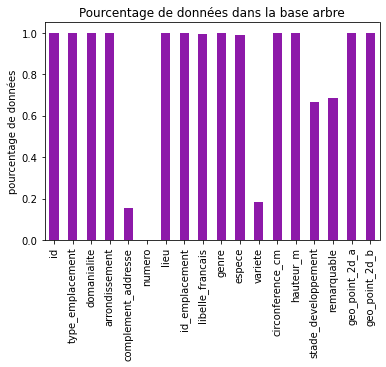

In [2]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import matplotlib.image as img


data = pd.read_csv('input/p2-arbres-fr.csv', delimiter = ';')
print('le fichier contient ', len(data.index),'lignes' )
print(data.count())

print('test unicité des valeurs du champs id:',len(set(data['id']))/len(data.index),'(1 = unique)')

#on peut également faire appel à l'option plotbar de pandas qui utilise matplotlib en sous jascent
pctdata=data.count()/len(data.index)
ax = pctdata.plot.bar(rot=90, color="#8d19a9", title='Pourcentage de données dans la base arbre', ylabel='pourcentage de données')


* 18 champs / 8 variables quantitatives / 10 qualitatives
* 9 champs peuvent être mis de coté pour notre analyse:
    * Les 2 champs id : id et id_emplacement
    * Le champ type_emplacement car 1 seule modalité
    * Les 3 champs de localisation par adresse: complement_adresse, numero et lieu
    * Le champs variétés qui possèdent trop de modalités et qui possèdent peu d’observations
    * Le champs remarquable: finalement trop peu d’arbres sont remarquables (moins de 0.09%) 


nombre de modalites - champs type_emplacement: 1
nombre de modalites - domanialite: 9
nombre de modalites - arrondissement: 25
nombre de modalites - lieu: 6921
nombre de modalites - libelle_francais: 192
nombre de modalites - genre: 175
nombre de modalites - espece: 539
nombre de modalites - variete: 436
nombre de modalites - circonference_cm: 531
nombre de modalites - hauteur_m: 143
nombre de modalites - stade_developpement: 4
nombre de modalites - remarquable: 2


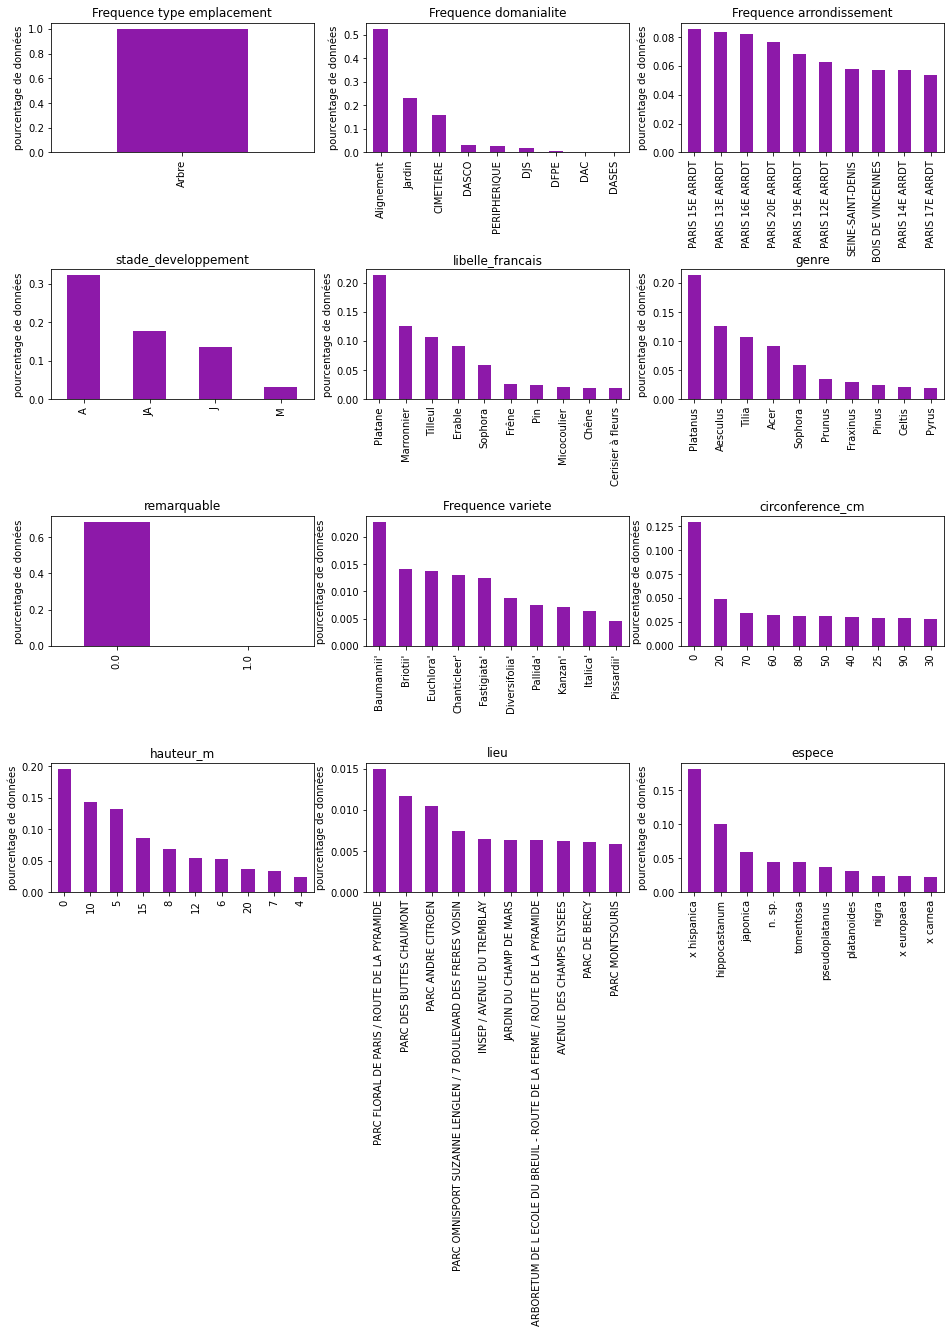

In [3]:
ax1 = plt.subplot(4,3,1)
d1=data['type_emplacement'].value_counts()/len(data.index)
ax1 = d1[0:min(10,len(d1))].plot.bar(rot=90, color="#8d19a9", title='Frequence type emplacement', ylabel='pourcentage de données',figsize=(16,16))

ax2 = plt.subplot(4,3,2)
d2=data['domanialite'].value_counts()/len(data.index)
ax2 = d2[0:min(10,len(d2))].plot.bar(rot=90, color="#8d19a9", title='Frequence domanialite', ylabel='pourcentage de données',figsize=(16,16))

ax3 = plt.subplot(4,3,3)
d3=data['arrondissement'].value_counts()/len(data.index)
ax3 = d3[0:min(10,len(d3))].plot.bar(rot=90, color="#8d19a9", title='Frequence arrondissement', ylabel='pourcentage de données',figsize=(16,16))

ax4 = plt.subplot(4,3,11)
d4=data['lieu'].value_counts()/len(data.index)
ax4 = d4[0:min(10,len(d4))].plot.bar(rot=90, color="#8d19a9", title='lieu', ylabel='pourcentage de données',figsize=(16,16))

ax5 = plt.subplot(4,3,5)
d5=data['libelle_francais'].value_counts()/len(data.index)
ax5 = d5[0:min(10,len(d5))].plot.bar(rot=90, color="#8d19a9", title='libelle_francais', ylabel='pourcentage de données',figsize=(16,16))

ax6 = plt.subplot(4,3,6)
d6=data['genre'].value_counts()/len(data.index)
ax6 = d6[0:min(10,len(d6))].plot.bar(rot=90, color="#8d19a9", title='genre', ylabel='pourcentage de données',figsize=(16,16))

ax7 = plt.subplot(4,3,12)
d7=data['espece'].value_counts()/len(data.index)
ax7 = d7[0:min(10,len(d7))].plot.bar(rot=90, color="#8d19a9", title='espece', ylabel='pourcentage de données',figsize=(16,16))

ax8 = plt.subplot(4,3,8)
d8=data['variete'].value_counts()/len(data.index)
ax8 = d8[0:min(10,len(d8))].plot.bar(rot=90, color="#8d19a9", title='Frequence variete', ylabel='pourcentage de données',figsize=(16,16))

ax9 = plt.subplot(4,3,9)
d9=data['circonference_cm'].value_counts()/len(data.index)
ax9 = d9[0:min(10,len(d9))].plot.bar(rot=90, color="#8d19a9", title='circonference_cm', ylabel='pourcentage de données',figsize=(16,16))

ax10 = plt.subplot(4,3,10)
d10=data['hauteur_m'].value_counts()/len(data.index)
ax10 = d10[0:min(10,len(d10))].plot.bar(rot=90, color="#8d19a9", title='hauteur_m', ylabel='pourcentage de données',figsize=(16,16))

ax11 = plt.subplot(4,3,4)
d11=data['stade_developpement'].value_counts()/len(data.index)
ax11 = d11[0:min(10,len(d11))].plot.bar(rot=90, color="#8d19a9", title='stade_developpement', ylabel='pourcentage de données',figsize=(16,16))

ax12 = plt.subplot(4,3,7)
d12=data['remarquable'].value_counts()/len(data.index)
ax12 = d12[0:min(10,len(d12))].plot.bar(rot=90, color="#8d19a9", title='remarquable', ylabel='pourcentage de données',figsize=(16,16))

print('nombre de modalites - champs type_emplacement:',len(d1) )
print('nombre de modalites - domanialite:',len(d2) )
print('nombre de modalites - arrondissement:',len(d3) )
print('nombre de modalites - lieu:',len(d4) )
print('nombre de modalites - libelle_francais:',len(d5) )
print('nombre de modalites - genre:',len(d6) )
print('nombre de modalites - espece:',len(d7) )
print('nombre de modalites - variete:',len(d8) )
print('nombre de modalites - circonference_cm:',len(d9) )
print('nombre de modalites - hauteur_m:',len(d10) )
print('nombre de modalites - stade_developpement:',len(d11) )
print('nombre de modalites - remarquable:',len(d12) )

plt.subplots_adjust(hspace=0.9)
plt.show()


### QUELS CHAMPS SONT NON DISCRIMINANTS?
* Le champs type_emplacement ne prend qu'une seule valeur et ne nous sera donc d'aucune utilité.  
* Enfin le champs libellé français , qui est fortement lié au champs genre avec légèrement moins d’observations peut être abandonné. Cette liaison peut être mise en évidence de façon visuelle u par un test de chi2 sur le tableau de contingence (liaison si chi2 élévé et pvalue faible / attention néanmoins au nombre de degré de liberté)


In [4]:
#1ère possibilité : on retire les doublons de lignes et on observe la relation à l'oeil sur un fichier csv
data2=data[['libelle_francais','genre']].drop_duplicates()
data2.to_csv('output/test.csv')

#2ème possibilité : le test du chi2 sur le tableau de contingence de 2 variables qualitatives
#tableau de contingence
data3=pd.crosstab(data['libelle_francais'],data['genre'])
#calcul chi2 et pvalue du tableau de contingence
from scipy.stats import chi2_contingency
chi2, pvalue, degrees, expected = chi2_contingency(data3)
print('chi2:',chi2,'dl:', degrees,'pvalue:', pvalue)
#si chi2 élevé et pvalue tres faible, on rejette H0 hypothèse d'indépendance => fortement lié
#attention au degré de liberté élevé qui peut compliquer l'analyse

chi2: 31976567.156921644 dl: 32661 pvalue: 0.0


# ETAPE 3 : NETTOYAGE DU JEU DE DONNEES
## FILTRAGE DES DONNEES DE DIMENSIONS
### 1er filtre par le haut
* Un arbre étant par définition visible , des circonférences et/ou des hauteurs de 0 sont des valeurs abbérantes ou non renseignées.  
    * Le plus grand arbre de Paris ne dépasse pas les **40m**.
    * Le plus gros arbre de Paris ne dépasse pas les **9m** de circonférence
* **13%** des arbres de la base n'ont aucune dimension renseignée
* Les arbres ont une circonférence médiane de **80cm** et une hauteur médiane de **10m**

nombre de circonférence à 0: 25867 , équivalent à  12.92 % de la table
nombre de hauteur à 0: 39219 , équivalent à  19.60 % de la table
nombre de circonférence à 0 et nombre de hauteur à 0: 25501 , équivalent à  12.74 % de la table

nombre de circonférence > 9m: 75 , équivalent à  0.04 % de la table
nombre de hauteur > 40m: 506 , équivalent à  0.25 % de la table
nombre de circonférence > 9m et nombre de hauteur > 40m: 2 , équivalent à  0.00 % de la table

min circonference: 1.0 cm
max circonference: 835.0 cm
moyenne circonference: 91.58 cm
mediane circonference: 80.0 cm
ecart type circonference: 58.95 cm
quantile 99.9% circonference: 400.0 cm
quantile 0.1% circonference: 10.0 cm

min hauteur: 1.0 m
max hauteur: 38.0 m
moyenne hauteur: 10.36 m
mediane hauteur: 10.0 m
ecart type hauteur: 5.14 m
quantile 99.9% hauteur: 30.0 m
quantile 0.1% hauteur: 1.0 m


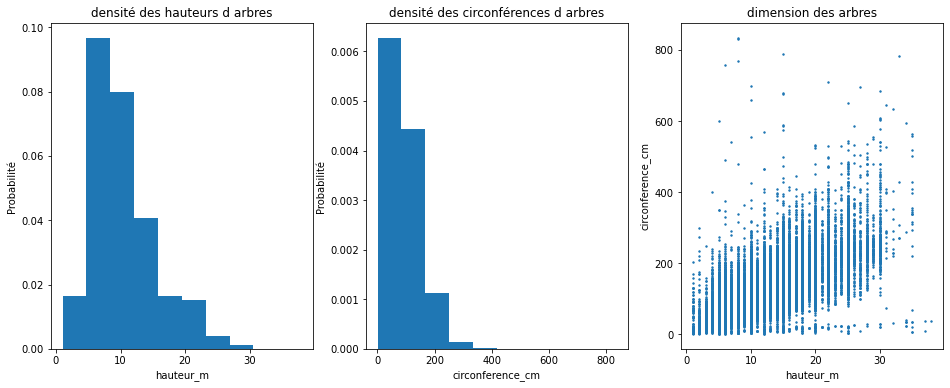

In [5]:
print('nombre de circonférence à 0:',len(data[data['circonference_cm']==0].index),', équivalent à ',"{:.2f}".format(len(data[data['circonference_cm']==0].index)/len(data.index)*100),'% de la table')
print('nombre de hauteur à 0:',len(data[data['hauteur_m']==0].index),', équivalent à ',"{:.2f}".format(len(data[data['hauteur_m']==0].index)/len(data.index)*100),'% de la table')
print('nombre de circonférence à 0 et nombre de hauteur à 0:',len(data[(data['hauteur_m']==0) & (data['circonference_cm']==0)].index),', équivalent à ',"{:.2f}".format(len(data[(data['hauteur_m']==0) & (data['circonference_cm']==0)].index)/len(data.index)*100),'% de la table')
print('')
print('nombre de circonférence > 9m:',len(data[data['circonference_cm']>=900].index),', équivalent à ',"{:.2f}".format(len(data[data['circonference_cm']>=900].index)/len(data.index)*100),'% de la table')
print('nombre de hauteur > 40m:',len(data[data['hauteur_m']>=40].index),', équivalent à ',"{:.2f}".format(len(data[data['hauteur_m']>=40].index)/len(data.index)*100),'% de la table')
print('nombre de circonférence > 9m et nombre de hauteur > 40m:',len(data[(data['hauteur_m']>=40) & (data['circonference_cm']>=900)].index),', équivalent à ',"{:.2f}".format(len(data[(data['hauteur_m']>=40) & (data['circonference_cm']>=900)].index)/len(data.index)*100),'% de la table')
print('')

#on remplace les 0 par des nan
data3=data.copy()
data3[['circonference_cm','hauteur_m']]=data3[['circonference_cm','hauteur_m']].replace(0,np.nan)
#on remplace les valeurs superieures à 40m et à 900cm par des nan
data3[data3['circonference_cm']>=900]=np.nan
data3[data3['hauteur_m']>=40]=np.nan

print('min circonference:',data3['circonference_cm'].min(),'cm')
print('max circonference:',data3['circonference_cm'].max(),'cm')
print('moyenne circonference:',"{:.2f}".format(data3['circonference_cm'].mean()),'cm')
print('mediane circonference:',data3['circonference_cm'].median(),'cm')
print('ecart type circonference:',"{:.2f}".format(data3['circonference_cm'].std()),'cm')
print('quantile 99.9% circonference:',data3['circonference_cm'].quantile(0.999),'cm')
print('quantile 0.1% circonference:',data3['circonference_cm'].quantile(0.001),'cm')
print('')
print('min hauteur:',data3['hauteur_m'].min(),'m')
print('max hauteur:',data3['hauteur_m'].max(),'m')
print('moyenne hauteur:',"{:.2f}".format(data3['hauteur_m'].mean()),'m')
print('mediane hauteur:',data3['hauteur_m'].median(),'m')
print('ecart type hauteur:',"{:.2f}".format(data3['hauteur_m'].std()),'m')
print('quantile 99.9% hauteur:',data3['hauteur_m'].quantile(0.999),'m')
print('quantile 0.1% hauteur:',data3['hauteur_m'].quantile(0.001),'m')

plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('hauteur_m')
ax1.set_ylabel('Probabilité')
ax1.set_title('densité des hauteurs d arbres')
ax1 = plt.hist(data3['hauteur_m'],density=True) #horizontal bar plot

ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('circonference_cm')
ax2.set_ylabel('Probabilité')
ax2.set_title('densité des circonférences d arbres')
ax2 = plt.hist(data3['circonference_cm'],density=True) #horizontal bar plot

ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('hauteur_m')
ax3.set_ylabel('circonference_cm')
ax3.set_title('dimension des arbres')
ax3 = plt.scatter(x =data3['hauteur_m'], y=data3['circonference_cm'],alpha=1, s=2)


plt.subplots_adjust(hspace=0.9)
plt.show()

### 1ème filtre par la méthode IQR sur chacune des espèces d'arbres
* Ce filtre utilise bien connue basée sur une mesure de dispersion  
    * Par défaut un coeeficient de 1.5 est utilisé.
    * **2% des circonférences** sont coupées et à remesurer
    * **2.75% des hauteurs** sont coupées et à remesurer



IQR threshold= 1.5  - filtration: circonferences: 1.96 % hauteurs: 2.76 % circonférences et hauteurs: 0.59 %


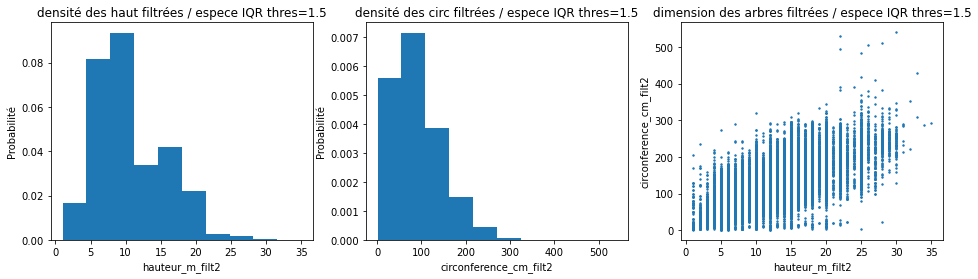

In [6]:
def size_cut_quantile(datain,ventil='genre',qdown=0.01,qup=0.99,putnr='YES',affich='YES', iqr='YES', iqrcut=1.5):
    temp=datain
    
    #init
    temp['circ_f2']=temp['circonference_cm']
    temp['haut_f2']=temp['hauteur_m']
    temp['flagfilt_circ']=np.nan
    temp['flagfilt_haut']=np.nan
    temp['flagfilt_circ_down']=np.nan
    temp['flagfilt_haut_down']=np.nan
    temp['flagfilt_circ_up']=np.nan
    temp['flagfilt_haut_up']=np.nan
    
    #temp.to_csv('output/test.csv')
    
    ventilus=set(data3[ventil])
    #print(ventilus)
    for i in ventilus:
        
        #methode IQR (interquartile range pour les outliers)
        if iqr=='YES':
            q1circ=temp.loc[(temp[ventil]==i),['circonference_cm']].quantile(q=0.25)[0]
            q3circ=temp.loc[(temp[ventil]==i),['circonference_cm']].quantile(q=0.75)[0]
            q1haut=temp.loc[(temp[ventil]==i),['hauteur_m']].quantile(q=0.25)[0]
            q3haut=temp.loc[(temp[ventil]==i),['hauteur_m']].quantile(q=0.75)[0]
            iqrcirc=q3circ-q1circ
            iqrhaut=q3haut-q1haut
            
            qdown_circ=q1circ-iqrcut*iqrcirc
            qup_circ=q3circ+iqrcut*iqrcirc
            qdown_haut=q1haut-iqrcut*iqrhaut
            qup_haut=q3haut+iqrcut*iqrhaut
        else:    
            qdown_circ=temp.loc[(temp[ventil]==i),['circonference_cm']].quantile(q=qdown)[0]
            qup_circ=temp.loc[(temp[ventil]==i),['circonference_cm']].quantile(q=qup)[0]
            qdown_haut=temp.loc[(temp[ventil]==i),['hauteur_m']].quantile(q=qdown)[0]
            qup_haut=temp.loc[(temp[ventil]==i),['hauteur_m']].quantile(q=qup)[0]
        
        #print(ventil,i,qdown*100,qdown_circ,qup_circ,qdown_haut,qup_haut,end="\r")
        
        if putnr=='YES':
            temp.loc[(temp[ventil]==i) & (temp['circ_f2']<=qdown_circ),['circ_f2','flagfilt_circ','flagfilt_circ_down']]=[np.nan,1,1]
            temp.loc[(temp[ventil]==i) & (temp['circ_f2']>=qup_circ),['circ_f2','flagfilt_circ','flagfilt_circ_up']]=[np.nan,1,1]
            temp.loc[(temp[ventil]==i) & (temp['haut_f2']<=qdown_haut),['haut_f2','flagfilt_haut','flagfilt_haut_down']]=[np.nan,1,1]
            temp.loc[(temp[ventil]==i) & (temp['haut_f2']>=qup_haut),['haut_f2','flagfilt_haut','flagfilt_haut_up']]=[np.nan,1,1]
        else:
            temp.loc[(temp[ventil]==i) & (temp['circ_f2']<=qdown_circ),['circ_f2']]=qdown_circ
            temp.loc[(temp[ventil]==i) & (temp['circ_f2']>=qup_circ),['circ_f2']]=qup_circ
            temp.loc[(temp[ventil]==i) & (temp['haut_f2']<=qdown_haut),['haut_f2']]=qdown_haut
            temp.loc[(temp[ventil]==i) & (temp['haut_f2']>=qup_haut),['haut_f2']]=qup_haut
    
    
    if iqr=='YES':
        print('IQR threshold=',iqrcut,' - filtration: circonferences:',"{:.2f}".format(temp['flagfilt_circ'].sum()/len(temp.index)*100),'% hauteurs:',
         "{:.2f}".format(temp['flagfilt_haut'].sum()/len(temp.index)*100),'% circonférences et hauteurs:',
         "{:.2f}".format(temp.loc[(temp['flagfilt_circ']==1) & (temp['flagfilt_haut']==1),['flagfilt_circ']].sum()[0]/len(temp.index)*100),'%')
    
        output=[ventil,iqrcut,iqr,
            temp['flagfilt_circ'].sum()/len(temp.index)*100,
            temp['flagfilt_circ_down'].sum()/len(temp.index)*100,
            temp['flagfilt_circ_up'].sum()/len(temp.index)*100,
            temp['flagfilt_haut'].sum()/len(temp.index)*100,
            temp['flagfilt_haut_down'].sum()/len(temp.index)*100,
            temp['flagfilt_haut_up'].sum()/len(temp.index)*100,
            temp.loc[(temp['flagfilt_circ']==1) & (temp['flagfilt_haut']==1),['flagfilt_circ']].sum()[0]/len(temp.index)*100,
            temp['circ_f2'].min(),
            temp['circ_f2'].max(),
            temp['haut_f2'].min(),
            temp['haut_f2'].max()]

    else:
        print('q=',qdown*100,'% - filtration: circonferences:',"{:.2f}".format(temp['flagfilt_circ'].sum()/len(temp.index)*100),'% hauteurs:',
         "{:.2f}".format(temp['flagfilt_haut'].sum()/len(temp.index)*100),'% circonférences et hauteurs:',
         "{:.2f}".format(temp.loc[(temp['flagfilt_circ']==1) & (temp['flagfilt_haut']==1),['flagfilt_circ']].sum()[0]/len(temp.index)*100),'%')
    
    
        output=[ventil,qdown,qup,
            temp['flagfilt_circ'].sum()/len(temp.index)*100,
            temp['flagfilt_circ_down'].sum()/len(temp.index)*100,
            temp['flagfilt_circ_up'].sum()/len(temp.index)*100,
            temp['flagfilt_haut'].sum()/len(temp.index)*100,
            temp['flagfilt_haut_down'].sum()/len(temp.index)*100,
            temp['flagfilt_haut_up'].sum()/len(temp.index)*100,
            temp.loc[(temp['flagfilt_circ']==1) & (temp['flagfilt_haut']==1),['flagfilt_circ']].sum()[0]/len(temp.index)*100,
            temp['circ_f2'].min(),
            temp['circ_f2'].max(),
            temp['haut_f2'].min(),
            temp['haut_f2'].max()]
    
    #temp.to_csv('output/test.csv')
    
    if (affich=='YES'):
        plt.figure(figsize=(16,4))
        ax1 = plt.subplot(1,3,1)
        ax1.set_xlabel('hauteur_m_filt2')
        ax1.set_ylabel('Probabilité')
        if iqr=='YES':
            ax1.set_title('densité des haut filtrées / '+ventil+' IQR thres='+str(iqrcut))
        else:
            ax1.set_title('densité des haut filtrées / '+ventil+' q='+str(qdown*100)+'%')
        ax1 = plt.hist(temp['haut_f2'],density=True) #horizontal bar plot

        ax2 = plt.subplot(1,3,2)
        ax2.set_xlabel('circonference_cm_filt2')
        ax2.set_ylabel('Probabilité')
        if iqr=='YES':
            ax2.set_title('densité des circ filtrées / '+ventil+' IQR thres='+str(iqrcut))
        else:
            ax2.set_title('densité des circ filtrées / '+ventil+' q='+str(qdown*100)+'%')
        ax2 = plt.hist(temp['circ_f2'],density=True) #horizontal bar plot

        ax3 = plt.subplot(1,3,3)
        ax3.set_xlabel('hauteur_m_filt2')
        ax3.set_ylabel('circonference_cm_filt2')
        if iqr=='YES':
            ax3.set_title('dimension des arbres filtrées / '+ventil+' IQR thres='+str(iqrcut))
        else:
            ax3.set_title('dimension des arbres filtrées / '+ventil+' q='+str(qdown*100)+'%')
        ax3 = plt.scatter(x =temp['haut_f2'], y=temp['circ_f2'],alpha=1, s=2)

        plt.subplots_adjust(hspace=0.9)
        plt.show()
            
    return output
        
#size_cut_quantile(data3,ventil='genre',qdown=0.005,qup=0.995,putnr='YES',affich='YES')
#size_cut_quantile(data3,ventil='genre',qdown=0.01,qup=0.99,putnr='YES',affich='YES')
#size_cut_quantile(data3,ventil='genre',qdown=0.05,qup=0.95,putnr='YES',affich='YES')

#size_cut_quantile(data3,ventil='espece',qdown=0.005,qup=0.995,putnr='YES',affich='YES')
#size_cut_quantile(data3,ventil='espece',qdown=0.02,qup=0.98,putnr='YES',affich='YES')
#size_cut_quantile(data3,ventil='espece',qdown=0.05,qup=0.95,putnr='YES',affich='YES')

size_cut_quantile(data3,ventil='espece',qdown=0.02,qup=0.98,putnr='YES',affich='YES',iqr='YES', iqrcut=1.5)

def boucle_size_cut_quantile(datain,ventil='genre',qa=1,qb=2.2,qtick=0.2,iqr='YES'):
    j=0
    x=np.arange(qa, qb, qtick).tolist()
    for i in x:
        j=j+1
        if iqr=='YES':
            out=size_cut_quantile(datain,ventil=ventil,putnr='YES',affich='NO',iqr='YES', iqrcut=i)
        else:
            out=size_cut_quantile(datain,ventil=ventil,qdown=i,qup=(1-i),putnr='YES',affich='NO',iqr='NO')
        if j==1:
            out2df=out
        elif j==2:
            out2df=[out2df]+[out]
        else:
            out2df=out2df+[out]

    #construction dataframe à partir d'une liste       
    df = pd.DataFrame(out2df, columns = ['ventilation', 'qdown','qup',
                                         'cutcircpct','cutcircdownpct','cutcircuppct',
                                         'cuthautpct','cuthautdownpct','cuthautuppct',
                                        'cutcirchautpct',
                                        'circmin','circmax',
                                        'hautmin','hautmax'])

    #['tab:blue', 'tab:green', 'tab:red', 'tab:pink','tab:gray']
    fig, ax = plt.subplots()
    pha = 1
    x = df['qdown']
    y = df['cutcircdownpct']
    ax.plot(x, y, c='tab:blue',dashes=[8, 2], label='pct circ down cut',
               alpha=pha)
    x = df['qdown']
    y = df['cutcircuppct']
    ax.plot(x, y, c='tab:blue',dashes=[2, 2], label='pct circ up cut',
               alpha=pha)
    x = df['qdown']
    y = df['cutcircpct']
    ax.plot(x, y, c='tab:blue', label='pct circ cut',
               alpha=pha)
    
    x = df['qdown']
    y = df['cuthautdownpct']
    ax.plot(x, y, c='tab:red',dashes=[8, 2], label='pct haut down cut',
               alpha=pha)
    x = df['qdown']
    y = df['cuthautuppct']
    ax.plot(x, y, c='tab:red',dashes=[2, 2], label='pct haut up cut',
               alpha=pha)
    x = df['qdown']
    y = df['cuthautpct']
    ax.plot(x, y, c='tab:red', label='pct haut cut',
               alpha=pha)
    

    ax.legend()
    ax.grid(True)
    if iqr=='YES':
        plt.xlabel('coefficient IQR')
        plt.ylabel('pourcentage cutté')
        plt.title('filtre par IQR')
    else:
        plt.xlabel('quantile')
        plt.ylabel('pourcentage cutté')
        plt.title('filtre par quantile')
    plt.show()
    
    fig, ax = plt.subplots()
    pha = 1
    x = df['qdown']
    y = df['circmin']
    ax.plot(x, y, c='tab:blue',dashes=[8, 2], label='circ min cm',
               alpha=pha)
    x = df['qdown']
    y = df['circmax']
    ax.plot(x, y, c='tab:blue',dashes=[2, 2], label='circ max cm',
               alpha=pha)
    ax.set_ylabel('circonference cm',color='tab:blue')

    ax2=ax.twinx()
    x = df['qdown']
    y = df['hautmin']
    ax2.plot(x, y, c='tab:red',dashes=[8, 2], label='hauteur min m',
               alpha=pha)
    x = df['qdown']
    y = df['hautmax']
    ax2.plot(x, y, c='tab:red',dashes=[2, 2], label='hauteur max m',
               alpha=pha)
    ax2.set_ylabel('hauteur_m',color='tab:red')
    ax2.legend(loc=7)

    

    ax.legend(loc=6)
    ax.grid(True)
    if iqr=='YES':
        plt.xlabel('coefficient IQR')
        #plt.ylabel('pourcentage cutté')
        plt.title('filtre par IQR')
    else:
        plt.xlabel('quantile')
        #plt.ylabel('pourcentage cutté')
        plt.title('filtre par quantile')
    plt.show()

        
#boucle_size_cut_quantile(data3,ventil='espece',qa=2.2,qb=0.8,qtick=-0.2,iqr='YES')


# ETAPE 3 : NETTOYAGE DU JEU DE DONNEES
## ESTIMATION DES STADES DE DEVELOPPEMENT MANQUANTS
* 33.9% des stades de développement de ne sont pas renseignés
* 6% des arbres ont un stade estimable seulement par la circonférence
* 15% des arbres ont un stade de développement estimable par la circonférence et la hauteur

Tilia, Platanus, Acer, Asculus, Prunus représentent 46% des genres d’arbres à stade manquant => analysons plus précisément ces genres



In [7]:
#function which estimates the "stade_developpement"
#based on 'hauteur' & 'circonference' 
#percentileofscore algo for matching
#field 'stade_est'

from scipy import stats

def stade_dev_finder_func(datain, discrim_field ='YES',field='genre',modal='Tilia'):
    temp=datain.copy() #copy vaut mieux que egal qui ne fait que faire une reference donc tout changement impacte la reference
    temp['color_dev']=0
    temp['haut_moy_dev']=temp['haut_f2']#temp['hauteur_m']
    temp['circ_moy_dev']=temp['circ_f2']#temp['circonference_cm']
    
    if (discrim_field =='YES'):
        temp2=temp.loc[(temp['stade_developpement'].isnull())&(temp[field]==modal),['haut_f2','circ_f2']]
        #temph=temp.loc[(temp['stade_developpement'].isnull())&(temp[field]==modal)&(temp['haut_f2'].notnull()),['haut_f2']]
        #tempc=temp.loc[(temp['stade_developpement'].isnull())&(temp[field]==modal)&(temp['circ_f2'].notnull()),['circ_f2']]
        for stade in ['J','JA','A','M']:
            tot_haut=temp.loc[(temp['stade_developpement']==stade)&(temp[field]==modal)&(temp['haut_f2'].notnull()),['haut_moy_dev']]
            tot_circ=temp.loc[(temp['stade_developpement']==stade)&(temp[field]==modal)&(temp['circ_f2'].notnull()),['circ_moy_dev']]

            temp2['h_pctil_'+stade]=temp2['haut_f2'].apply(lambda x: abs(stats.percentileofscore(tot_haut,x)-50))
            temp2['c_pctil_'+stade]=temp2['circ_f2'].apply(lambda x: abs(stats.percentileofscore(tot_circ,x)-50))
            temp2[stade]= temp2[['h_pctil_'+stade, 'c_pctil_'+stade]].mean(axis=1)
        #on trouve le min qui est le stade le plus probable 
        temp2['stade_est']=temp2[['J','JA','A','M']].idxmin(axis=1)
        temp.loc[(temp['stade_developpement'].isnull())&(temp[field]==modal),'stade_est']=temp2['stade_est']
        #display(temp)
    return temp

def loop_stade_dev_finder_func(df):
    temp=df.copy()
    ventilus=set(temp['genre'])
    j=0
    for i in ventilus:
        temp=stade_dev_finder_func(temp, discrim_field ='YES',field='genre',modal=i)
        j=j+1
        print(end='\r')
        #astuce de l'espace pour qu il ne reste pas de bout a la reecriture
        print(i,'_OK_completion:',j/len(ventilus)*100,'%                           ',end='\r')
    return temp    

data3=loop_stade_dev_finder_func(data3)

In [8]:
print('nombre de stade de dev non renseignés:',data3['stade_developpement'].isna().sum(),', équivalent à ',"{:.2f}".format(data3['stade_developpement'].isna().sum()/len(data3.index)*100),'% de la table')
print('nombre de stade de dev non renseignés et non estimables aprés le 1er filtre:',
      len(data3[(data3['hauteur_m'].isna()) & (data3['circonference_cm'].isna()) & (data3['stade_developpement'].isna())].index),', équivalent à ',
          "{:.2f}".format(len(data3[(data3['hauteur_m'].isna()) & (data3['circonference_cm'].isna()) & (data3['stade_developpement'].isna())].index)/len(data3.index)*100),'% de la table')
print('nombre de stade de dev non renseignés et non estimables aprés le filtre IQR:',
      len(data3[(data3['haut_f2'].isna()) & (data3['circ_f2'].isna()) & (data3['stade_developpement'].isna())].index),', équivalent à ',
          "{:.2f}".format(len(data3[(data3['haut_f2'].isna()) & (data3['circ_f2'].isna()) & (data3['stade_developpement'].isna())].index)/len(data3.index)*100),'% de la table')
print('nombre de stade de dev non renseignés et estimables seulement par la circonférence:',
      len(data3[(data3['hauteur_m'].isna()) & (data3['circonference_cm']>0) & (data3['stade_developpement'].isna())].index),', équivalent à ',
          "{:.2f}".format(len(data3[(data3['hauteur_m'].isna()) & (data3['circonference_cm']>0) & (data3['stade_developpement'].isna())].index)/len(data3.index)*100),'% de la table')
print('nombre de stade de dev non renseignés et estimables seulement par la hauteur:',
      len(data3[(data3['hauteur_m']>0) & (data3['circonference_cm'].isna()) & (data3['stade_developpement'].isna())].index),', équivalent à ',
          "{:.2f}".format(len(data3[(data3['hauteur_m']>0) & (data3['circonference_cm'].isna()) & (data3['stade_developpement'].isna())].index)/len(data3.index)*100),'% de la table')
print('nombre de stade de dev non renseignés et estimables par la hauteur et la circonférence:',
      len(data3[(data3['hauteur_m']>0) & (data3['circonference_cm']>0) & (data3['stade_developpement'].isna())].index),', équivalent à ',
          "{:.2f}".format(len(data3[(data3['hauteur_m']>0) & (data3['circonference_cm']>0) & (data3['stade_developpement'].isna())].index)/len(data3.index)*100),'% de la table')

data3['color_dev']=0
data3['haut_moy_dev']=data3['haut_f2']
data3['circ_moy_dev']=data3['circ_f2']

#on met les couleurs pour les futurs charts
data3.loc[(data3['stade_developpement']=='J') | (data3['stade_est']=='J'),['color_dev']]='tab:blue'
data3.loc[(data3['stade_developpement']=='JA') | (data3['stade_est']=='JA'),['color_dev']]='tab:green'
data3.loc[(data3['stade_developpement']=='A') | (data3['stade_est']=='A'),['color_dev']]='tab:red'
data3.loc[(data3['stade_developpement']=='M') | (data3['stade_est']=='M'),['color_dev']]='tab:pink'
data3.loc[(data3['stade_developpement'].isna())&(data3['stade_est'].isna()),['color_dev']]='tab:gray'

#mediane par stade pour les hauteurs filtrées
data3.loc[data3['stade_developpement']=='J',['haut_moy_dev']]=data3.loc[data3['stade_developpement']=='J',['haut_f2']].median()[0]
data3.loc[data3['stade_developpement']=='JA',['haut_moy_dev']]=data3.loc[data3['stade_developpement']=='JA',['haut_f2']].median()[0]
data3.loc[data3['stade_developpement']=='A',['haut_moy_dev']]=data3.loc[data3['stade_developpement']=='A',['haut_f2']].median()[0]
data3.loc[data3['stade_developpement']=='M',['haut_moy_dev']]=data3.loc[data3['stade_developpement']=='M',['haut_f2']].median()[0]

#mediane par stade pour les circonferences filtrées
data3.loc[data3['stade_developpement']=='J',['circ_moy_dev']]=data3.loc[data3['stade_developpement']=='J',['circ_f2']].median()[0]
data3.loc[data3['stade_developpement']=='JA',['circ_moy_dev']]=data3.loc[data3['stade_developpement']=='JA',['circ_f2']].median()[0]
data3.loc[data3['stade_developpement']=='A',['circ_moy_dev']]=data3.loc[data3['stade_developpement']=='A',['circ_f2']].median()[0]
data3.loc[data3['stade_developpement']=='M',['circ_moy_dev']]=data3.loc[data3['stade_developpement']=='M',['circ_f2']].median()[0]



print('hauteur mediane pour arbre J:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='J',['haut_f2']].median()[0]),
      'stdev:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='J',['haut_f2']].std()[0]),
      'et circonference mediane pour arbre J:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='J',['circ_f2']].median()[0]),
      'stdev:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='J',['circ_f2']].std()[0]))
print('hauteur mediane pour arbre JA:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='JA',['haut_f2']].median()[0]),
      'stdev:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='JA',['haut_f2']].std()[0]),
      'et circonference mediane pour arbre JA:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='JA',['circ_f2']].median()[0]),
      'stdev:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='JA',['circ_f2']].std()[0]))
print('hauteur mediane pour arbre A:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='A',['haut_f2']].median()[0]),
      'stdev:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='A',['haut_f2']].std()[0]),
      'et circonference mediane pour arbre A:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='A',['circ_f2']].median()[0]),
      'stdev:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='A',['circ_f2']].std()[0]))
print('hauteur mediane pour arbre M:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='M',['haut_f2']].median()[0]),
      'stdev:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='M',['haut_f2']].std()[0]),
      'et circonference mediane pour arbre M:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='M',['circ_f2']].median()[0]),
      'stdev:',"{:.2f}".format(data3.loc[data3['stade_developpement']=='M',['circ_f2']].std()[0]))


nombre de stade de dev non renseignés: 67759 , équivalent à  33.86 % de la table
nombre de stade de dev non renseignés et non estimables aprés le 1er filtre: 25843 , équivalent à  12.91 % de la table
nombre de stade de dev non renseignés et non estimables aprés le filtre IQR: 26659 , équivalent à  13.32 % de la table
nombre de stade de dev non renseignés et estimables seulement par la circonférence: 11687 , équivalent à  5.84 % de la table
nombre de stade de dev non renseignés et estimables seulement par la hauteur: 315 , équivalent à  0.16 % de la table
nombre de stade de dev non renseignés et estimables par la hauteur et la circonférence: 29914 , équivalent à  14.95 % de la table
hauteur mediane pour arbre J: 5.00 stdev: 2.04 et circonference mediane pour arbre J: 35.00 stdev: 18.50
hauteur mediane pour arbre JA: 9.00 stdev: 3.19 et circonference mediane pour arbre JA: 66.00 stdev: 25.23
hauteur mediane pour arbre A: 12.00 stdev: 4.19 et circonference mediane pour arbre A: 115.00 std

In [9]:
data4=data3[(data3['haut_f2']>0) & (data3['circ_f2']>0) & (data3['stade_developpement'].isna())]
d6=data4['genre'].value_counts()/len(data4.index)
print('Pourcentage d arbres aux stades de developpement non renseignés mais estimables')
print(d6.head(5))

Pourcentage d arbres aux stades de developpement non renseignés mais estimables
Tilia       0.111939
Platanus    0.101396
Acer        0.098194
Aesculus    0.092329
Prunus      0.048179
Name: genre, dtype: float64


# ETAPE 3 : NETTOYAGE DU JEU DE DONNEES
## ESTIMATION DES STADES DE DEVELOPPEMENT MANQUANTS

* Mise en place d’un **algorithme d’affectation** de stade basé sur la fonction percentileofscore (pourcentage du score dans sa distribution):
    * Pour chaque arbre, on attribue un pourcentage de score en fonction de sa hauteur , de sa circonférence ou des 2 si disponibles pour chaque stade. On attribue le stade qui a le pourcentage le plus proche de 50 (en gros le stade le plus probable)


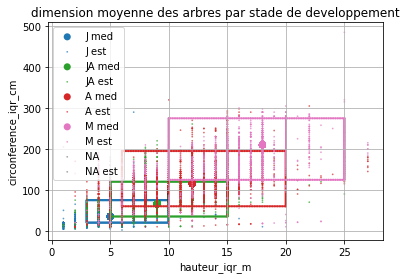

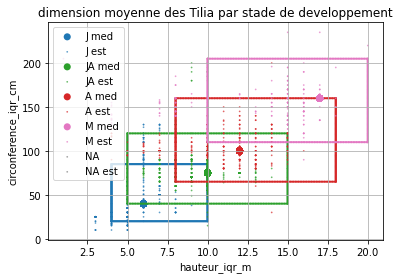

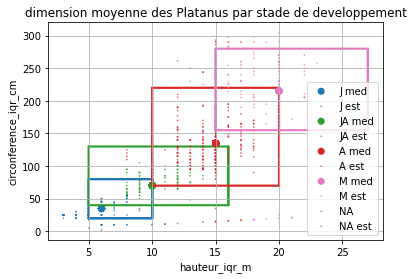

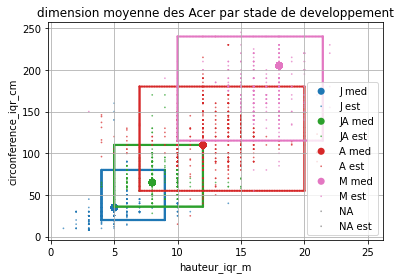

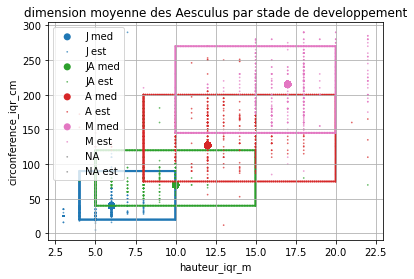

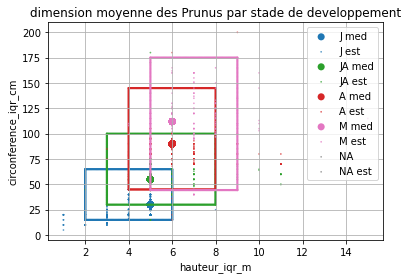

In [10]:
def stade_dev_func(datain, discrim_field ='YES',field='genre',modal='Tilia',qtil=0.1):
    temp=datain.copy() #copy vaut mieux que egal qui ne fait que faire une reference donc tout changement impacte la reference
    temp['color_dev']=0
    temp['haut_moy_dev']=temp['haut_f2']#temp['hauteur_m']
    temp['circ_moy_dev']=temp['circ_f2']#temp['circonference_cm']
    
    #color by dev level
    temp.loc[(temp['stade_developpement']=='J')|(temp['stade_est']=='J'),['color_dev']]='tab:blue'
    temp.loc[(temp['stade_developpement']=='JA')|(temp['stade_est']=='JA'),['color_dev']]='tab:green'
    temp.loc[(temp['stade_developpement']=='A')|(temp['stade_est']=='A'),['color_dev']]='tab:red'
    temp.loc[(temp['stade_developpement']=='M')|(temp['stade_est']=='M'),['color_dev']]='tab:pink'
    temp.loc[(temp['stade_developpement'].isna())&(temp['stade_est'].isna()),['color_dev']]='tab:gray'
    
    for stade in ['J','JA','A','M']:
        if (discrim_field =='YES'):
            temp.loc[(temp['stade_developpement']==stade)&(temp[field]==modal),['haut_moy_dev']]=temp.loc[(temp['stade_developpement']==stade)&(temp[field]==modal),['haut_f2']].median()[0]
            temp.loc[(temp['stade_developpement']==stade)&(temp[field]==modal),['circ_moy_dev']]=temp.loc[(temp['stade_developpement']==stade)&(temp[field]==modal),['circ_f2']].median()[0]
            min_haut=temp.loc[(temp['stade_developpement']==stade)&(temp[field]==modal),['haut_f2']].quantile(q=qtil)[0]
            max_haut=temp.loc[(temp['stade_developpement']==stade)&(temp[field]==modal),['haut_f2']].quantile(q=(1-qtil))[0]
            min_circ=temp.loc[(temp['stade_developpement']==stade)&(temp[field]==modal),['circ_f2']].quantile(q=qtil)[0]
            max_circ=temp.loc[(temp['stade_developpement']==stade)&(temp[field]==modal),['circ_f2']].quantile(q=(1-qtil))[0]
        else:
            temp.loc[(temp['stade_developpement']==stade),['haut_moy_dev']]=temp.loc[(temp['stade_developpement']==stade),['haut_f2']].median()[0]
            temp.loc[(temp['stade_developpement']==stade),['circ_moy_dev']]=temp.loc[(temp['stade_developpement']==stade),['circ_f2']].median()[0]
            min_haut=temp.loc[(temp['stade_developpement']==stade),['haut_f2']].quantile(q=qtil)[0]
            max_haut=temp.loc[(temp['stade_developpement']==stade),['haut_f2']].quantile(q=(1-qtil))[0]
            min_circ=temp.loc[(temp['stade_developpement']==stade),['circ_f2']].quantile(q=qtil)[0]
            max_circ=temp.loc[(temp['stade_developpement']==stade),['circ_f2']].quantile(q=(1-qtil))[0]
        
        
        #dev level square
        ABx=[min_haut]*100        
        ABy=np.linspace(min_circ, max_circ, num=100).tolist()
        BCx=np.linspace(min_haut, max_haut, num=100).tolist()       
        BCy=[max_circ]*100
        CDx=[max_haut]*100        
        CDy=np.linspace(max_circ, min_circ, num=100).tolist()
        DAx=np.linspace(max_haut, min_haut, num=100).tolist()        
        DAy=[min_circ]*100
        
        if stade=='J':
            carrex=ABx+BCx+CDx+DAx
            carrey=ABy+BCy+CDy+DAy
            stadedev=[stade]*400
        else:
            carrex=carrex+ABx+BCx+CDx+DAx
            carrey=carrey+ABy+BCy+CDy+DAy
            stadedev=stadedev+[stade]*400
            
    from pandas import DataFrame
    carre = DataFrame ([carrex,carrey,stadedev]).transpose()
    carre.columns=['x','y','dev']
    carre.loc[carre['dev']=='J',['color']]='tab:blue'
    carre.loc[carre['dev']=='JA',['color']]='tab:green'
    carre.loc[carre['dev']=='A',['color']]='tab:red'
    carre.loc[carre['dev']=='M',['color']]='tab:pink'

            
    fig, ax = plt.subplots()
    for color in ['tab:blue', 'tab:green', 'tab:red', 'tab:pink','tab:gray']:
        if (discrim_field =='YES'):
            x = temp.loc[(temp['color_dev']==color)&(temp[field]==modal)&(temp['stade_developpement'].notna()),['haut_moy_dev']]
            y = temp.loc[(temp['color_dev']==color)&(temp[field]==modal)&(temp['stade_developpement'].notna()),['circ_moy_dev']]
            
            x2 = temp.loc[(temp['color_dev']==color)&(temp[field]==modal)&(temp['stade_est'].notna()),['haut_moy_dev']]
            y2 = temp.loc[(temp['color_dev']==color)&(temp[field]==modal)&(temp['stade_est'].notna()),['circ_moy_dev']]
        else:
            x = temp.loc[(temp['color_dev']==color)&(temp['stade_developpement'].notna()),['haut_moy_dev']]
            y = temp.loc[(temp['color_dev']==color)&(temp['stade_developpement'].notna()),['circ_moy_dev']]
            
            x2 = temp.loc[(temp['color_dev']==color)&(temp['stade_est'].notna()),['haut_moy_dev']]
            y2 = temp.loc[(temp['color_dev']==color)&(temp['stade_est'].notna()),['circ_moy_dev']]
            
        if (color=='tab:gray'):
            scale =3 
            pha = 0.7
        else:
            scale = 50
            pha = 1
            
        if (color=='tab:blue'):
            lab='J med'
            lab2='J est'
        elif (color=='tab:green'):
            lab='JA med'
            lab2='JA est'
        elif (color=='tab:red'):
            lab='A med'
            lab2='A est'
        elif (color=='tab:pink'):
            lab='M med'
            lab2='M est'
        elif (color=='tab:gray'):
            lab='NA'
            lab2='NA est'
            
        
        ax.scatter(x, y, c=color, s=scale,alpha=pha,label=lab, edgecolors='none')
        
 
        ax.scatter(x2, y2, c=color, s=3,alpha=0.7, label=lab2, edgecolors='none')
        
        x = carre.loc[(carre['color']==color),['x']]
        y = carre.loc[(carre['color']==color),['y']]
        ax.scatter(x, y, c=color, s=5,
               alpha=1, edgecolors='none')

    ax.legend()
    ax.grid(True)
    plt.xlabel('hauteur_iqr_m')
    plt.ylabel('circonference_iqr_cm')
    if (discrim_field =='YES'):
        plt.title('dimension moyenne des '+str(modal)+' par stade de developpement')
    else:
        plt.title('dimension moyenne des arbres par stade de developpement')
    plt.show()



stade_dev_func(data3, discrim_field ='NO',field='genre',modal='Tilia',qtil=0.05)
stade_dev_func(data3, discrim_field ='YES',field='genre',modal='Tilia',qtil=0.05)
stade_dev_func(data3, discrim_field ='YES',field='genre',modal='Platanus',qtil=0.05)
stade_dev_func(data3, discrim_field ='YES',field='genre',modal='Acer',qtil=0.05)
stade_dev_func(data3, discrim_field ='YES',field='genre',modal='Aesculus',qtil=0.05)
stade_dev_func(data3, discrim_field ='YES',field='genre',modal='Prunus',qtil=0.05)

# ETAPE 4 : ANALYSE GEOGRAPHIQUE
## PAR ARRONDISSEMENT
* La majorité des arbres se trouvent dans les **arrondissements périphériques** de paris. On peut y ajouter les bois de vincennes et le 93. 


       arrondissement  pct_arbres
0     PARIS 15E ARRDT    0.085566
1     PARIS 13E ARRDT    0.082329
2     PARIS 16E ARRDT    0.081849
3     PARIS 20E ARRDT    0.076588
4     PARIS 19E ARRDT    0.068363
5     PARIS 12E ARRDT    0.062742
6   SEINE-SAINT-DENIS    0.057780
7   BOIS DE VINCENNES    0.057401
8     PARIS 14E ARRDT    0.056876
9     PARIS 17E ARRDT    0.053723
10    PARIS 18E ARRDT    0.049881
11     PARIS 7E ARRDT    0.042731
12       VAL-DE-MARNE    0.037839
13     PARIS 8E ARRDT    0.036185
14    PARIS 11E ARRDT    0.028216
15     HAUTS-DE-SEINE    0.026472
16   BOIS DE BOULOGNE    0.019861
17    PARIS 10E ARRDT    0.016898
18     PARIS 4E ARRDT    0.013666
19     PARIS 5E ARRDT    0.011747
20     PARIS 6E ARRDT    0.008769
21    PARIS 1ER ARRDT    0.007025
22     PARIS 3E ARRDT    0.006041
23     PARIS 9E ARRDT    0.005831
24     PARIS 2E ARRDT    0.002728


<ipython-input-11-c06f33772bfb>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data6=data3.groupby(data3['arrondissement'])['geo_point_2d_a','geo_point_2d_b'].mean()


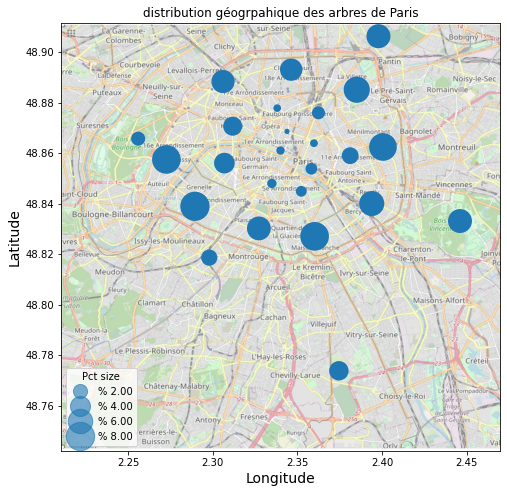

In [11]:
data4=data3['arrondissement'].value_counts()/len(data3.index)
#on passe l'index en colum via le reste index function
data5=data4.reset_index()
#renaming
data5.columns = ['arrondissement', 'pct_arbres']
print(data5)
data6=data3.groupby(data3['arrondissement'])['geo_point_2d_a','geo_point_2d_b'].mean()
data7 = pd.merge(data5, data6, how="inner", on=['arrondissement'])
data7['size']=data7['pct_arbres']*10000

####################################################
#box de la MAP : we use min and max of GPS data
BBox=(data['geo_point_2d_a'].min(),data['geo_point_2d_a'].max(),data['geo_point_2d_b'].min(),data['geo_point_2d_b'].max())


paris_img=img.imread('C:/Users/wesh/OCR/P2/paris_tree.png')

fig, ax = plt.subplots(figsize=(7.87,7.87))
scatter=ax.scatter(data7['geo_point_2d_b'], data7['geo_point_2d_a'], s=data7['size'], label='arbres',alpha=1,
                edgecolors='none')

plt.imshow(paris_img, extent=[2.2102, 2.4698, 48.7422, 48.9115], alpha=0.8,aspect='auto')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('distribution géogrpahique des arbres de Paris')

# Produce a legend for the size. Because we want to show size in %, 
# we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=5,alpha=0.6, color='tab:blue', fmt="% {x:.2f}",func=lambda s: (s/100))
legend1 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower left", title="Pct size")

plt.show()


#automatic legend
#handles, labels = scatter.legend_elements(prop='sizes', alpha=0.6)
#legend1 = ax.legend(handles, labels, loc="lower left", title="Sizes")


plt.show()



# ETAPE 4 : ANALYSE GEOGRAPHIQUE
## PAR ARRONDISSEMENT ET DOMANIALITE
* Plus de la moitié des arbres sont sur des alignements, ¼ sont dans des jardins et 1/6 dans les cimetières
* Les jardins sont assez corrélés en terme de taille et de position avec les alignements. 
* Les cimetières possédant le plus d’arbres sont en dehors de Paris dans le 93/94/92. Le père Lachaise fait exception



Alignement      0.523052
Jardin          0.230872
CIMETIERE       0.159441
DASCO           0.031998
PERIPHERIQUE    0.026607
DJS             0.018407
DFPE            0.006600
DAC             0.000105
DASES           0.000020
Name: domanialite, dtype: float64


<ipython-input-12-42168245260e>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data6=data3.groupby(['arrondissement','domanialite'])['geo_point_2d_a','geo_point_2d_b'].mean()


"Pourcentage d'arbres par domanialite et par arrondissement"

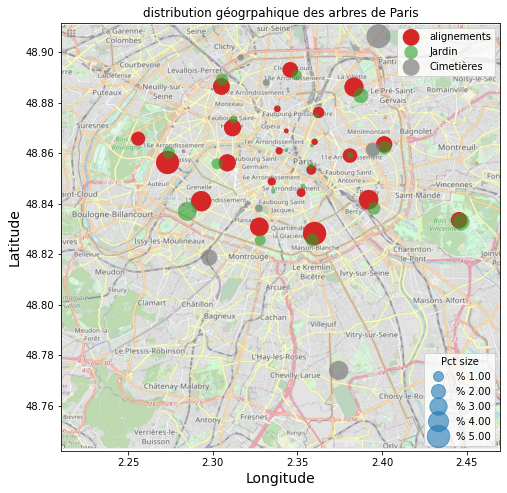

In [12]:
data4=data3['domanialite'].value_counts()/len(data3.index)
print(data4)
#on passe l'index en colum via le reste index function
data5=data4.reset_index()
data3['chiffre']=1
#renaming
#data5.columns = ['domanialite', 'pct_arbres']
data6=data3.groupby(['arrondissement','domanialite'])['geo_point_2d_a','geo_point_2d_b'].mean()
data7=data3.groupby(['arrondissement','domanialite'])['chiffre'].sum()/len(data3.index)*10000

data11=data3.loc[(data3['domanialite']=='Alignement') | (data3['domanialite']=='CIMETIERE')| (data3['domanialite']=='Jardin'),:]
data12=pd.crosstab(data11['arrondissement'], data11['domanialite'])
data12['Alignement']=data12['Alignement']/len(data3.index)*100
data12['CIMETIERE']=data12['CIMETIERE']/len(data3.index)*100
data12['Jardin']=data12['Jardin']/len(data3.index)*100

data13=data12.sort_values(by=['Alignement'],ascending=False,)
display("Pourcentage d'arbres par domanialite et par arrondissement")
display(data13.style.background_gradient().format('%{:,.2f}'))


data8 = pd.merge(data6, data7, how="inner", on=['arrondissement','domanialite'])
data9=data8.reset_index()

data10=data9.loc[(data9['domanialite']=='Alignement') | (data9['domanialite']=='Jardin') | (data9['domanialite']=='CIMETIERE'),:]
#print(data10)
#print(data9.loc[(data9['domanialite']=='Alignement'),:])
#print(data9.loc[(data9['domanialite']=='Jardin'),:])
#print(data9.loc[(data9['domanialite']=='CIMETIERE'),:])

####################################################
#box de la MAP : we use min and max of GPS data
BBox=(data['geo_point_2d_a'].min(),data['geo_point_2d_a'].max(),data['geo_point_2d_b'].min(),data['geo_point_2d_b'].max())


paris_img=img.imread('C:/Users/wesh/OCR/P2/paris_tree.png')

fig, ax = plt.subplots(figsize=(7.87,7.87))
x=data10.loc[data10['domanialite']=='Alignement','geo_point_2d_b']
y=data10.loc[data10['domanialite']=='Alignement','geo_point_2d_a']
si=data10.loc[data10['domanialite']=='Alignement','chiffre']
ax.scatter(x, y, s=si,color='tab:red', label='alignements',alpha=1,
                edgecolors='none')

x=data10.loc[data10['domanialite']=='Jardin','geo_point_2d_b']
y=data10.loc[data10['domanialite']=='Jardin','geo_point_2d_a']
si=data10.loc[data10['domanialite']=='Jardin','chiffre']
ax.scatter(x, y, s=si,color='tab:green', label='Jardin',alpha=0.6,
                edgecolors='none')

x=data10.loc[data10['domanialite']=='CIMETIERE','geo_point_2d_b']
y=data10.loc[data10['domanialite']=='CIMETIERE','geo_point_2d_a']
si=data10.loc[data10['domanialite']=='CIMETIERE','chiffre']
scatter=ax.scatter(x, y, s=si,color='tab:gray', label='Cimetières',alpha=0.7,
                edgecolors='none')
legend1=ax.legend()
ax.add_artist(legend1)
plt.imshow(paris_img, extent=[2.2102, 2.4698, 48.7422, 48.9115], alpha=0.8,aspect='auto')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('distribution géogrpahique des arbres de Paris')

# Produce a legend for the size. Because we want to show size in %, 
# we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.

kw = dict(prop="sizes", num=5,alpha=0.6, color='tab:blue', fmt="% {x:.2f}",func=lambda s: (s/100))
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Pct size")

plt.show()


#automatic legend
#handles, labels = scatter.legend_elements(prop='sizes', alpha=0.6)
#legend1 = ax.legend(handles, labels, loc="lower left", title="Sizes")


#plt.show()

# ETAPE 4 : ANALYSE GEOGRAPHIQUE
## PAR ARRONDISSEMENT, DOMANIALITE ET GENRE D'ARBRES
* **Le Platane est de loin l’arbre parisien le plus représenté avec 21%**
    * Les 5 premiers genres d’arbres sur environ 200 représente 60% des arbres parisiens:
    * Les 10 premiers 75%
* **Focus sur les alignements**
    * **Le platane avec 34%** est l’arbre qui règne en maître sur les alignements
    * Les 5 genres d’arbres les plus communs de Paris représente cette fois ci 75% des alignements
* **Focus sur les cimetières**
    * **Les acers (érables) y représentent 21% des arbres**
    * Les platanes bien que représentés dans le top 5 ne constituent que 9.5% des arbres des cimetières
* **Focus sur les jardins**
    * La représentation des arbres y est un peu **plus hétérogène** qu’ailleurs:
    * Les 5 premiers genres y représentent seulement 41% des arbres, Les 10 premiers 60%
    * Les platanes n’y représentent que 4.3% et sont à la 7ème positions des genres les plus représentés
* **Par arrondissement**   
    * Les 5 genres d’arbres les plus représentés le sont également dans les arrondissements périphériques moitié sud de Paris: 16/15/14/13/12/20 ème  et bois de Vincennes.
    * La plus forte représentation de Platanes se trouvent dans le 7ème et 16ème et que celle d’aesculus (marronniers) se trouve dans le 8ème et 16ème





Pourcentage d arbres à paris par genre
      index     genre     cusum
0  Platanus  0.212130  0.212130
1  Aesculus  0.126393  0.338523
2     Tilia  0.107267  0.445790
3      Acer  0.092167  0.537956
4   Sophora  0.059020  0.596976
5    Prunus  0.035186  0.632162
6  Fraxinus  0.030014  0.662176
7     Pinus  0.024258  0.686435
8    Celtis  0.020481  0.706916
9     Pyrus  0.019612  0.726527


<ipython-input-13-0c512489224e>:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',


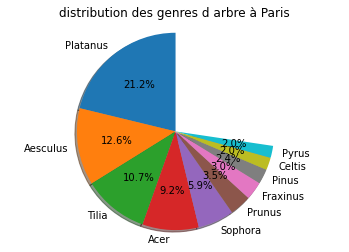

Pourcentage d arbres par genre
pour les alignements parisiens
      index     genre     cusum
0  Platanus  0.341167  0.341167
1  Aesculus  0.156655  0.497822
2     Tilia  0.113496  0.611318
3   Sophora  0.084981  0.696299
4      Acer  0.052339  0.748639
5    Celtis  0.027111  0.775749
6   Corylus  0.023003  0.798752
7  Fraxinus  0.020930  0.819682
8     Pyrus  0.020433  0.840116
9    Prunus  0.016641  0.856757


<ipython-input-13-0c512489224e>:35: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',


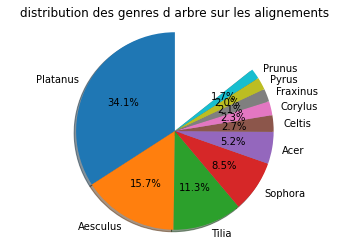

Pourcentage d arbres par genre
pour les cimetières parisiens
           index     genre     cusum
0           Acer  0.206706  0.206706
1       Aesculus  0.126355  0.333062
2          Tilia  0.096615  0.429677
3       Platanus  0.095299  0.524976
4       Fraxinus  0.068129  0.593106
5  Chamaecyparis  0.032216  0.625321
6         Prunus  0.031025  0.656346
7        Sophora  0.029834  0.686180
8         Celtis  0.020777  0.706957
9        Corylus  0.020495  0.727452


<ipython-input-13-0c512489224e>:56: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',


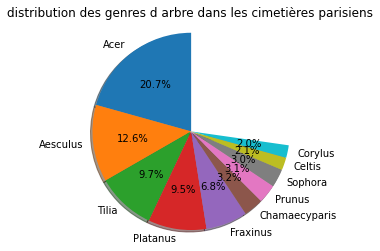

<ipython-input-13-0c512489224e>:77: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',


Pourcentage d arbres par genre
pour les jardins parisiens
      index     genre     cusum
0     Tilia  0.106739  0.106739
1      Acer  0.097650  0.204389
2     Pinus  0.083474  0.287863
3    Prunus  0.065879  0.353742
4  Aesculus  0.063801  0.417543
5   Quercus  0.046033  0.463576
6  Platanus  0.042917  0.506493
7    Betula  0.034606  0.541099
8   Sophora  0.033524  0.574622
9     Fagus  0.033026  0.607648


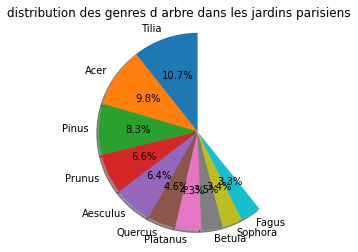

In [13]:
data4=data3['genre'].value_counts()/len(data3.index)
data4=data4.reset_index()
data4['cusum']=data4['genre'].cumsum()
print('Pourcentage d arbres à paris par genre')
print(data4.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data4.head(10)['index']
sizes = data4.head(10)['genre']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des genres d arbre à Paris')
plt.show()


data4=data3.loc[data3['domanialite']=='Alignement']
data5=data4['genre'].value_counts()/len(data4.index)
data5=data5.reset_index()
data5['cusum']=data5['genre'].cumsum()
print('Pourcentage d arbres par genre')
print('pour les alignements parisiens')
print(data5.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data5.head(10)['index']
sizes = data5.head(10)['genre']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des genres d arbre sur les alignements')
plt.show()

data4=data3.loc[data3['domanialite']=='CIMETIERE']
data5=data4['genre'].value_counts()/len(data4.index)
data5=data5.reset_index()
data5['cusum']=data5['genre'].cumsum()
print('Pourcentage d arbres par genre')
print('pour les cimetières parisiens')
print(data5.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data5.head(10)['index']
sizes = data5.head(10)['genre']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des genres d arbre dans les cimetières parisiens')
plt.show()

data4=data3.loc[data3['domanialite']=='Jardin']
data5=data4['genre'].value_counts()/len(data4.index)
data5=data5.reset_index()
data5['cusum']=data5['genre'].cumsum()
print('Pourcentage d arbres par genre')
print('pour les jardins parisiens')
print(data5.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data5.head(10)['index']
sizes = data5.head(10)['genre']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des genres d arbre dans les jardins parisiens')
plt.show()


<ipython-input-13-53f92edcfd85>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data6=data3.groupby(['arrondissement','genre'])['geo_point_2d_a','geo_point_2d_b'].mean()


"Pourcentage d'arbres par genre et par arrondissement"

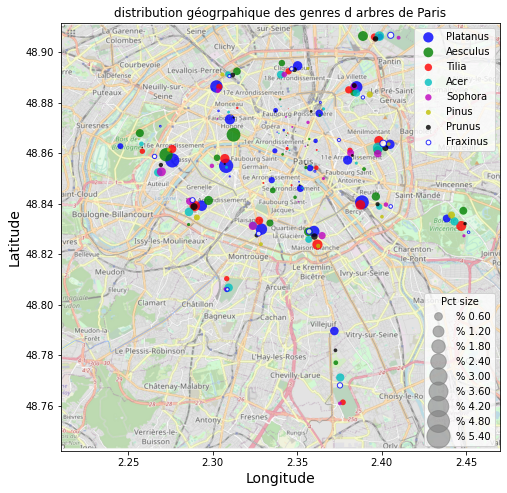

In [13]:

data3['chiffre']=1
#renaming
#data5.columns = ['domanialite', 'pct_arbres']
data6=data3.groupby(['arrondissement','genre'])['geo_point_2d_a','geo_point_2d_b'].mean()
data7=data3.groupby(['arrondissement','genre'])['chiffre'].sum()/len(data3.index)*10000

data11=data3.loc[(data3['genre']=='Platanus')|
                 (data3['genre']=='Aesculus')| 
                 (data3['genre']=='Tilia')|
                 (data3['genre']=='Acer')|
                 (data3['genre']=='Sophora')|
                 (data3['genre']=='Pinus')|
                 (data3['genre']=='Prunus')|
                 (data3['genre']=='Fraxinus')
                 ,:]
data12=pd.crosstab(data11['arrondissement'], data11['genre'])
data12['Platanus']=data12['Platanus']/len(data3.index)
data12['Aesculus']=data12['Aesculus']/len(data3.index)
data12['Tilia']=data12['Tilia']/len(data3.index)
data12['Acer']=data12['Acer']/len(data3.index)
data12['Sophora']=data12['Sophora']/len(data3.index)
data12['Pinus']=data12['Pinus']/len(data3.index)
data12['Prunus']=data12['Prunus']/len(data3.index)
data12['Fraxinus']=data12['Fraxinus']/len(data3.index)

import seaborn as sns
cm = sns.light_palette('green', as_cmap=True)

#format sortie %
pd.options.display.float_format = '%{:,.2f}'.format


data13=data12*100
data13=data13.loc[:,['Platanus','Aesculus','Tilia','Acer','Sophora']]
data13=data13.sort_values(by=['Platanus'],ascending=False,)

#data13.apply(pd.to_numeric)
display("Pourcentage d'arbres par genre et par arrondissement")
display(data13.style.background_gradient().format('%{:,.2f}'))


data8 = pd.merge(data6, data7, how="inner", on=['arrondissement','genre'])
data9=data8.reset_index()

data10=data9.loc[(data9['genre']=='Platanus') |
                 (data9['genre']=='Aesculus')| 
                 (data9['genre']=='Tilia')|
                 (data9['genre']=='Acer')|
                 (data9['genre']=='Sophora')|
                 (data9['genre']=='Pinus')|
                 (data9['genre']=='Prunus')|
                 (data9['genre']=='Fraxinus')
                 ,:]

#reset formattage
pd.reset_option('^display.', silent=True)

#print(data10)
#print(data9.loc[(data9['domanialite']=='Alignement'),:])
#print(data9.loc[(data9['domanialite']=='Jardin'),:])
#print(data9.loc[(data9['domanialite']=='CIMETIERE'),:])

####################################################
#box de la MAP : we use min and max of GPS data
BBox=(data['geo_point_2d_a'].min(),data['geo_point_2d_a'].max(),data['geo_point_2d_b'].min(),data['geo_point_2d_b'].max())


paris_img=img.imread('C:/Users/wesh/OCR/P2/paris_tree.png')

fig, ax = plt.subplots(figsize=(7.87,7.87))
x=data10.loc[data10['genre']=='Platanus','geo_point_2d_b']
y=data10.loc[data10['genre']=='Platanus','geo_point_2d_a']
si=data10.loc[data10['genre']=='Platanus','chiffre']
ax.scatter(x, y, s=si,color='b', label='Platanus',alpha=0.8,
                edgecolors='none')

x=data10.loc[data10['genre']=='Aesculus','geo_point_2d_b']
y=data10.loc[data10['genre']=='Aesculus','geo_point_2d_a']
si=data10.loc[data10['genre']=='Aesculus','chiffre']
ax.scatter(x, y, s=si,color='g', label='Aesculus',alpha=0.8,
                edgecolors='none')

x=data10.loc[data10['genre']=='Tilia','geo_point_2d_b']
y=data10.loc[data10['genre']=='Tilia','geo_point_2d_a']
si=data10.loc[data10['genre']=='Tilia','chiffre']
ax.scatter(x, y, s=si,color='r', label='Tilia',alpha=0.8,
                edgecolors='none')

x=data10.loc[data10['genre']=='Acer','geo_point_2d_b']
y=data10.loc[data10['genre']=='Acer','geo_point_2d_a']
si=data10.loc[data10['genre']=='Acer','chiffre']
ax.scatter(x, y, s=si,color='c', label='Acer',alpha=0.8,
                edgecolors='none')

x=data10.loc[data10['genre']=='Sophora','geo_point_2d_b']
y=data10.loc[data10['genre']=='Sophora','geo_point_2d_a']
si=data10.loc[data10['genre']=='Sophora','chiffre']
ax.scatter(x, y, s=si,color='m', label='Sophora',alpha=0.8,
                edgecolors='none')

x=data10.loc[data10['genre']=='Pinus','geo_point_2d_b']
y=data10.loc[data10['genre']=='Pinus','geo_point_2d_a']
si=data10.loc[data10['genre']=='Pinus','chiffre']
ax.scatter(x, y, s=si,color='y', label='Pinus',alpha=0.8,
                edgecolors='none')

x=data10.loc[data10['genre']=='Prunus','geo_point_2d_b']
y=data10.loc[data10['genre']=='Prunus','geo_point_2d_a']
si=data10.loc[data10['genre']=='Prunus','chiffre']
ax.scatter(x, y, s=si,color='k', label='Prunus',alpha=0.8,
                edgecolors='none')

x=data10.loc[data10['genre']=='Fraxinus','geo_point_2d_b']
y=data10.loc[data10['genre']=='Fraxinus','geo_point_2d_a']
si=data10.loc[data10['genre']=='Fraxinus','chiffre']
ax.scatter(x, y, s=si,color='w', label='Fraxinus',alpha=0.8,
                edgecolors='b')


legend1=ax.legend()
ax.add_artist(legend1)
plt.imshow(paris_img, extent=[2.2102, 2.4698, 48.7422, 48.9115], alpha=0.8,aspect='auto')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('distribution géogrpahique des genres d arbres de Paris')

# Produce a legend for the size. Because we want to show size in %, 
# we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.

kw = dict(prop="sizes", num=10,alpha=0.6, color='tab:gray', fmt="% {x:.2f}",func=lambda s: (s/100))
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Pct size")

plt.show()


#automatic legend
#handles, labels = scatter.legend_elements(prop='sizes', alpha=0.6)
#legend1 = ax.legend(handles, labels, loc="lower left", title="Sizes")


#plt.show()

# ETAPE 4 : ANALYSE GEOGRAPHIQUE
## PAR ARRONDISSEMENT, DOMANIALITE, GENRE D'ARBRES ET STADE DE DEVELOPPEMENT
* Avant traitement, 2/3 de la base possédaient un champs stade de développement renseigné. 
    * Sur ces 2/3, une bonne moitié est constituée d’arbres adultes. Très peu sont matures . Une autre bonne moitié peut être qualifiée de jeune/jeune adulte
    * L’estimation des stades manquants ne change pas énormément la donne sur la répartition relative des stades
* **Focus sur les alignements:**
    * Seulement 10% des arbres sans stade renseigné
        * Meilleur suivi électronique des alignements , comparativement aux autres domanialités
    * Beaucoup d’adultes, peu de matures
    * 18% des arbres sont strictement jeunes. 
        * Travail énorme
        * 19000 arbres plantés récemment.
        * forte proportion forcément abattue auparavant.
        * Les stades manquants des alignements pouvant être estimés  sont en majorité des arbres jeunes
* **Focus sur les Cimetières et les Jardins:**
    * Avant traitement , seulement 1/3 des arbres des cimetières et des jardins sont renseignés. Ces domanialités sont donc clairement moins suivies , du moins électroniquement parlant, que les alignements
    * Après estimation , une bonne moitié des arbres des cimetières ne  possèdent toujours pas de stade de développement. 
        * Le résultat est bien meilleur dans les jardins
* **analyse géographiqe par arrondissement:**
    * Avant estimation des stades manquants:
        * Le stade  de développement le plus représenté est l’adulte (en majorité dans les 20e/16e/15e) 
        * Les jeunes arbres sont en majorité dans le 13/14e et bois de vincennes
    * Après estimation des stades manquants:
        * on a relativement la même analyse que précédemment
        * Les autres arrondissements périphériques reçoivent une proportion un peu plus importante d’arbres jeunes.
        
* Les alignements des arrondissements périphériques mènent le jeu pour tous les stades.
* Dans le 93/94 , les cimetières font de même
* Les arbres matures sont présents dans les alignements et jardins du 13/16 et 19e et les cimetières exterieurs


Pourcentage d arbres à paris par stade de developpement
  index  stade_developpement     cusum
0   NaN             0.338563  0.338563
1     A             0.321100  0.659663
2    JA             0.175605  0.835268
3     J             0.134278  0.969546
4     M             0.030454  1.000000


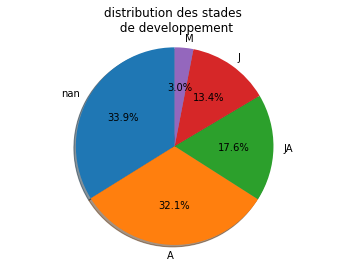

Pourcentage d arbres par stade de developpement
pour les alignements parisiens
  index  stade_developpement     cusum
0     A             0.423301  0.423301
1    JA             0.259749  0.683050
2     J             0.183212  0.866262
3   NaN             0.102616  0.968877
4     M             0.031123  1.000000


<ipython-input-14-d6527e8c2210>:35: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',


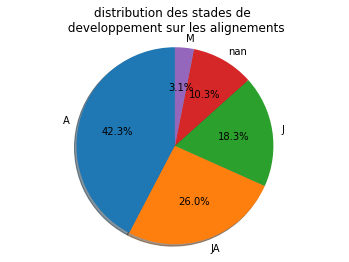

Pourcentage d arbres par stade de developpement
pour les cimetières parisiens
  index  stade_developpement     cusum
0   NaN             0.632623  0.632623
1     A             0.207208  0.839831
2    JA             0.071232  0.911062
3     J             0.045691  0.956753
4     M             0.043247  1.000000


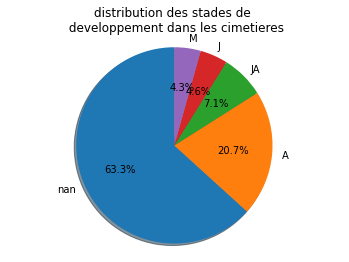

Pourcentage d arbres par stade de developpement
pour les jardins parisiens
  index  stade_developpement     cusum
0   NaN             0.658940  0.658940
1     A             0.178808  0.837748
2    JA             0.070077  0.907826
3     J             0.069104  0.976929
4     M             0.023071  1.000000


<ipython-input-14-d6527e8c2210>:77: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',


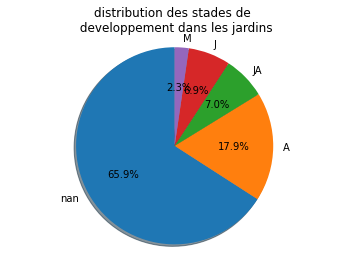

In [14]:
data4=data3['stade_developpement'].value_counts(dropna=False)/len(data3.index)
data4=data4.reset_index()
data4['cusum']=data4['stade_developpement'].cumsum()
print('Pourcentage d arbres à paris par stade de developpement')
print(data4.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data4.head(10)['index']
sizes = data4.head(10)['stade_developpement']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des stades \n de developpement')
plt.show()


data4=data3.loc[data3['domanialite']=='Alignement']
data5=data4['stade_developpement'].value_counts(dropna=False)/len(data4.index)
data5=data5.reset_index()
data5['cusum']=data5['stade_developpement'].cumsum()
print('Pourcentage d arbres par stade de developpement')
print('pour les alignements parisiens')
print(data5.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data5.head(10)['index']
sizes = data5.head(10)['stade_developpement']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des stades de \n developpement sur les alignements')
plt.show()

data4=data3.loc[data3['domanialite']=='CIMETIERE']
data5=data4['stade_developpement'].value_counts(dropna=False)/len(data4.index)
data5=data5.reset_index()
data5['cusum']=data5['stade_developpement'].cumsum()
print('Pourcentage d arbres par stade de developpement')
print('pour les cimetières parisiens')
print(data5.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data5.head(10)['index']
sizes = data5.head(10)['stade_developpement']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des stades de \n developpement dans les cimetieres')
plt.show()

data4=data3.loc[data3['domanialite']=='Jardin']
data5=data4['stade_developpement'].value_counts(dropna=False)/len(data4.index)
data5=data5.reset_index()
data5['cusum']=data5['stade_developpement'].cumsum()
print('Pourcentage d arbres par stade de developpement')
print('pour les jardins parisiens')
print(data5.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data5.head(10)['index']
sizes = data5.head(10)['stade_developpement']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des stades de \n developpement dans les jardins')
plt.show()

Pourcentage d arbres à paris par stade de developpement
aprés estimation des stades manquants
  index  stade_developpement     cusum
0     A             0.373724  0.373724
1    JA             0.226605  0.600329
2     J             0.214183  0.814512
3   NaN             0.133204  0.947716
4     M             0.052284  1.000000


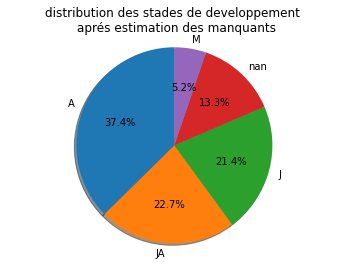

Pourcentage d arbres par stade de developpement
pour les alignements parisiens
aprés estimation des stades manquants
  index  stade_developpement     cusum
0     A             0.430752  0.430752
1    JA             0.267018  0.697770
2     J             0.238064  0.935834
3     M             0.034056  0.969890
4   NaN             0.030110  1.000000


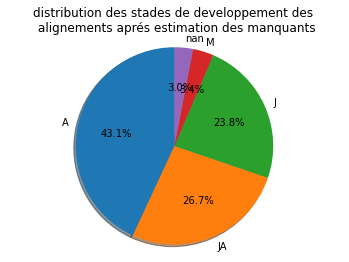

Pourcentage d arbres par stade de developpement
pour les cimetières parisiens
aprés estimation des stades manquants
  index  stade_developpement     cusum
0   NaN             0.450674  0.450674
1     A             0.262802  0.713475
2    JA             0.120401  0.833877
3     J             0.102382  0.936258
4     M             0.063742  1.000000


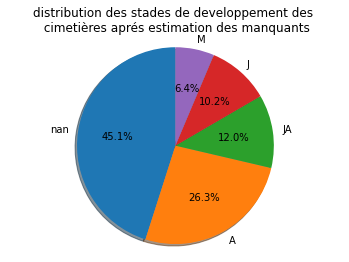

Pourcentage d arbres par stade de developpement
pour les jardins parisiens
aprés estimation des stades manquants
  index  stade_developpement     cusum
0     A             0.321127  0.321127
1    JA             0.207419  0.528546
2     J             0.196490  0.725036
3   NaN             0.183634  0.908670
4     M             0.091330  1.000000


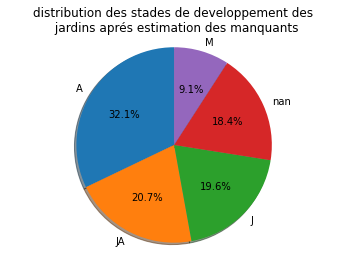

In [15]:
df=data3.copy()
df.loc[df['stade_developpement'].isna(),'stade_developpement']=df.loc[df['stade_developpement'].isna(),'stade_est']

data4=df['stade_developpement'].value_counts(dropna=False)/len(df.index)
data4=data4.reset_index()
data4['cusum']=data4['stade_developpement'].cumsum()
print('Pourcentage d arbres à paris par stade de developpement')
print('aprés estimation des stades manquants')
print(data4.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data4.head(10)['index']
sizes = data4.head(10)['stade_developpement']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des stades de developpement \n aprés estimation des manquants')
plt.show()


data4=df.loc[df['domanialite']=='Alignement']
data5=data4['stade_developpement'].value_counts(dropna=False)/len(data4.index)
data5=data5.reset_index()
data5['cusum']=data5['stade_developpement'].cumsum()
print('Pourcentage d arbres par stade de developpement')
print('pour les alignements parisiens')
print('aprés estimation des stades manquants')
print(data5.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data5.head(10)['index']
sizes = data5.head(10)['stade_developpement']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des stades de developpement des \n alignements aprés estimation des manquants')
plt.show()

data4=df.loc[df['domanialite']=='CIMETIERE']
data5=data4['stade_developpement'].value_counts(dropna=False)/len(data4.index)
data5=data5.reset_index()
data5['cusum']=data5['stade_developpement'].cumsum()
print('Pourcentage d arbres par stade de developpement')
print('pour les cimetières parisiens')
print('aprés estimation des stades manquants')
print(data5.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data5.head(10)['index']
sizes = data5.head(10)['stade_developpement']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des stades de developpement des \n cimetières aprés estimation des manquants')
plt.show()

data4=df.loc[df['domanialite']=='Jardin']
data5=data4['stade_developpement'].value_counts(dropna=False)/len(data4.index)
data5=data5.reset_index()
data5['cusum']=data5['stade_developpement'].cumsum()
print('Pourcentage d arbres par stade de developpement')
print('pour les jardins parisiens')
print('aprés estimation des stades manquants')
print(data5.head(10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data5.head(10)['index']
sizes = data5.head(10)['stade_developpement']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#explode=explode,
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('distribution des stades de developpement des \n jardins aprés estimation des manquants')
plt.show()

<ipython-input-16-8afbb8cd6d80>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data6=df.groupby(['arrondissement','stade_developpement'])['geo_point_2d_a','geo_point_2d_b'].mean()


Pourcentage d'arbres par stade
de developpement et par arrondissement


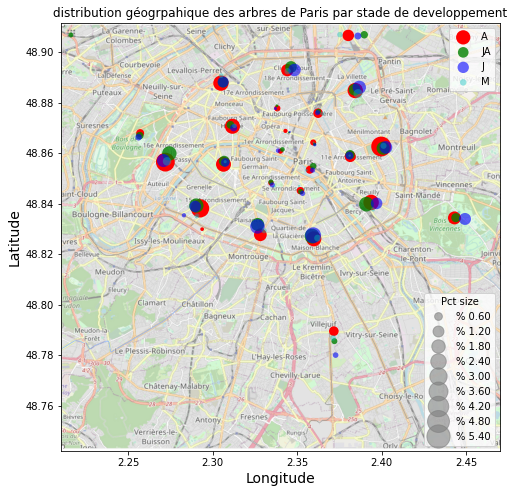

In [16]:

data3['chiffre']=1

df=data3.copy()
df.loc[df['stade_developpement'].isna(),'stade_developpement']=df.loc[df['stade_developpement'].isna(),'stade_est']
#renaming
#data5.columns = ['domanialite', 'pct_arbres']
data6=df.groupby(['arrondissement','stade_developpement'])['geo_point_2d_a','geo_point_2d_b'].mean()
data7=df.groupby(['arrondissement','stade_developpement'])['chiffre'].sum()/len(data3.index)*10000


data12=pd.crosstab(df['arrondissement'],df['stade_developpement'])
data12['J']=data12['J']/len(df.index)
data12['JA']=data12['JA']/len(df.index)
data12['A']=data12['A']/len(df.index)
data12['M']=data12['M']/len(df.index)


import seaborn as sns
cm = sns.light_palette('purple', as_cmap=True)

#format sortie %
pd.options.display.float_format = '%{:,.2f}'.format


data13=data12*100
data13=data13.loc[:,['J','JA','A','M']]
data13=data13.sort_values(by=['A'],ascending=False,)

#data13.apply(pd.to_numeric)
print("Pourcentage d'arbres par stade")
print("de developpement et par arrondissement")
display(data13.style.background_gradient(cm).format('%{:,.2f}'))


data8 = pd.merge(data6, data7, how="inner", on=['arrondissement','stade_developpement'])
data10=data8.reset_index()


#reset formattage
pd.reset_option('^display.', silent=True)

#print(data10)
#print(data9.loc[(data9['domanialite']=='Alignement'),:])
#print(data9.loc[(data9['domanialite']=='Jardin'),:])
#print(data9.loc[(data9['domanialite']=='CIMETIERE'),:])

####################################################
#box de la MAP : we use min and max of GPS data
BBox=(data['geo_point_2d_a'].min(),data['geo_point_2d_a'].max(),data['geo_point_2d_b'].min(),data['geo_point_2d_b'].max())


paris_img=img.imread('C:/Users/wesh/OCR/P2/paris_tree.png')

fig, ax = plt.subplots(figsize=(7.87,7.87))
x=data10.loc[data10['stade_developpement']=='A','geo_point_2d_b']
y=data10.loc[data10['stade_developpement']=='A','geo_point_2d_a']
si=data10.loc[data10['stade_developpement']=='A','chiffre']
ax.scatter(x, y, s=si,color='r', label='A',alpha=1,
                edgecolors='none')

x=data10.loc[data10['stade_developpement']=='JA','geo_point_2d_b']
y=data10.loc[data10['stade_developpement']=='JA','geo_point_2d_a']
si=data10.loc[data10['stade_developpement']=='JA','chiffre']
ax.scatter(x, y, s=si,color='g', label='JA',alpha=0.8,
                edgecolors='none')

x=data10.loc[data10['stade_developpement']=='J','geo_point_2d_b']
y=data10.loc[data10['stade_developpement']=='J','geo_point_2d_a']
si=data10.loc[data10['stade_developpement']=='J','chiffre']
ax.scatter(x, y, s=si,color='b', label='J',alpha=0.6,
                edgecolors='none')

x=data10.loc[data10['stade_developpement']=='M','geo_point_2d_b']
y=data10.loc[data10['stade_developpement']=='M','geo_point_2d_a']
si=data10.loc[data10['stade_developpement']=='M','chiffre']
ax.scatter(x, y, s=si,color='c', label='M',alpha=0.4,
                edgecolors='none')


legend1=ax.legend()
ax.add_artist(legend1)
plt.imshow(paris_img, extent=[2.2102, 2.4698, 48.7422, 48.9115], alpha=0.8,aspect='auto')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('distribution géogrpahique des arbres de Paris par stade de developpement')

# Produce a legend for the size. Because we want to show size in %, 
# we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.

kw = dict(prop="sizes", num=10,alpha=0.6, color='tab:gray', fmt="% {x:.2f}",func=lambda s: (s/100))
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Pct size")

plt.show()


#automatic legend
#handles, labels = scatter.legend_elements(prop='sizes', alpha=0.6)
#legend1 = ax.legend(handles, labels, loc="lower left", title="Sizes")


#plt.show()

In [17]:
df=data3.copy()
#df.loc[df['stade_developpement'].isna(),'stade_developpement']=df.loc[df['stade_developpement'].isna(),'stade_est']
df=df.loc[(df['domanialite']=='Alignement')|(df['domanialite']=='CIMETIERE')|(df['domanialite']=='Jardin'),:]
#df=df.loc[(df['genre']=='Platanus')|(df['genre']=='Aesculus')|(df['genre']=='Tilia')|(df['genre']=='Acer')|(df['genre']=='Sophora'),:]
data12=pd.crosstab(df['arrondissement'], [df['domanialite'],df['stade_developpement']])

import seaborn as sns
cm = sns.light_palette('purple', as_cmap=True)

#format sortie %
pd.options.display.float_format = '{:,.0f}'.format



#data13.apply(pd.to_numeric)
print("Nombre d'arbres pardomanialite et stade")
print("de developpement et par arrondissement")
print("avant estimation des stades manquants")
#print("aprés estimation des stades manquants")
display(data12.style.background_gradient(cm).format('{:,.0f}'))

Nombre d'arbres pardomanialite et stade
de developpement et par arrondissement
avant estimation des stades manquants


# ETAPE 5 : FOCUS SUR LES JEUNES ARBRES

* **Les jeunes arbres: synonyme d’abattage, de remplacement d’arbres potentiellement malades, puis d’entretien.**
* La majorité des arbres jeunes se trouvent dans les alignements  des arrondissements de la périphérie de paris. 
    * Les 13/14e arrivent en tête . Ensuite viennent le bois de Vincennes et les autres arrondissement périphériques (cf slide suivant)
* Le platane est de loin l’arbre le plus représenté chez les jeunes . Les marronniers viennent ensuite.


In [18]:
import seaborn as sns
cm = sns.light_palette('purple', as_cmap=True)

df=data3.copy()
#on remplace les stades NA par des estimations
df.loc[df['stade_developpement'].isna(),'stade_developpement']=df.loc[df['stade_developpement'].isna(),'stade_est']

print('les jeunes arbres, avant estimation des stades manquants sont au nombre de ',len(data3[data3['stade_developpement']=='J'].index), 'ce qui equivaut à ',"{:.2f}".format(len(data3[data3['stade_developpement']=='J'].index)/len(data3.index)*100),'% de la base')
print('les jeunes arbres, aprés estimation des stades manquants sont au nombre de ',len(df[df['stade_developpement']=='J'].index), 'ce qui equivaut à ',"{:.2f}".format(len(df[df['stade_developpement']=='J'].index)/len(df.index)*100),'% de la base')
print()
print('nombre d arbres jeunes par arrondissment')
print('avant et aprés estimation des stades manquants')
x=data3[data3['stade_developpement']=='J']['arrondissement'].value_counts()
x=x.reset_index()
x.columns = ['arrondissement', 'nb_arbres_av_est']
y=df[df['stade_developpement']=='J']['arrondissement'].value_counts()
y=y.reset_index()
y.columns = ['arrondissement', 'nb_arbres_ap_est']
z=pd.merge(x,y, how="inner", on=['arrondissement'])
display(z.style.background_gradient(cm))

print()
print('nombre d arbres jeunes par domanialite')
print('avant et aprés estimation des stades manquants')
x=data3[data3['stade_developpement']=='J']['domanialite'].value_counts()
x=x.reset_index()
x.columns = ['domanialite', 'nb_arbres_av_est']
y=df[df['stade_developpement']=='J']['domanialite'].value_counts()
y=y.reset_index()
y.columns = ['domanialite', 'nb_arbres_ap_est']
z=pd.merge(x,y, how="inner", on=['domanialite'])
display(z.style.background_gradient(cm))

print()
print('nombre d arbres jeunes par genre')
print('avant et aprés estimation des stades manquants')
x=data3[data3['stade_developpement']=='J']['genre'].value_counts()
x=x.reset_index()
x.columns = ['genre', 'nb_arbres_av_est']
y=df[df['stade_developpement']=='J']['genre'].value_counts()
y=y.reset_index()
y.columns = ['genre', 'nb_arbres_ap_est']
z=pd.merge(x,y, how="inner", on=['genre'])
display(z.head(10).style.background_gradient(cm))

df2=df.loc[(df['genre']=='Platanus') | (df['genre']=='Aesculus') |\
       (df['genre']=='Tilia') | (df['genre']=='Acer') |\
       (df['genre']=='Sophora') | (df['genre']=='Prunus') |\
       (df['genre']=='Pyrus') | (df['genre']=='Fraxinus') |\
       (df['genre']=='Quercus') | (df['genre']=='Celtis'),:]

df2=df2.loc[df2['stade_developpement']=='J',:]

y0=df2.groupby(df['genre'])['haut_f2'].size()
y0=y0.reset_index()
y0.columns = ['genre', 'nb']

y1=df2.groupby(df['genre'])['haut_f2','circ_f2'].mean()
y1=y1.reset_index()
y1.columns = ['genre', 'hauteur moy','circ moy']

y2=df2.groupby(df['genre'])['haut_f2','circ_f2'].median()
y2=y2.reset_index()
y2.columns = ['genre', 'hauteur med','circ med']


y3=df2.groupby(df['genre'])['haut_f2','circ_f2'].min()
y3=y3.reset_index()
y3.columns = ['genre', 'hauteur min','circ min']


y4=df2.groupby(df['genre'])['haut_f2','circ_f2'].max()
y4=y4.reset_index()
y4.columns = ['genre', 'hauteur max','circ max']


y5=df2.groupby(df['genre'])['haut_f2','circ_f2'].std()
y5=y5.reset_index()
y5.columns = ['genre', 'hauteur std','circ std']

z1=pd.merge(y0,y1, how="inner", on=['genre'])
z2=pd.merge(y2,y3, how="inner", on=['genre'])
z3=pd.merge(y4,y5, how="inner", on=['genre'])
z4=pd.merge(z1,z2, how="inner", on=['genre'])
z5=pd.merge(z4,z3, how="inner", on=['genre'])
#faut passer le genre en index sinon probleme pour le formattage des chiffres
z5=z5.set_index('genre')
z5=z5.sort_values(by=['nb'],ascending=False,)
print()
print('statistiques basiques des arbres jeunes')
print('des 10 premiers genres représentés')
print('aprés estimation des stades manquants')
display(z5.style.background_gradient(cm).format('{:,.1f}'))


les jeunes arbres, avant estimation des stades manquants sont au nombre de  26874 ce qui equivaut à  13.43 % de la base
les jeunes arbres, aprés estimation des stades manquants sont au nombre de  42866 ce qui equivaut à  21.42 % de la base

nombre d arbres jeunes par arrondissment
avant et aprés estimation des stades manquants



nombre d arbres jeunes par domanialite
avant et aprés estimation des stades manquants



nombre d arbres jeunes par genre
avant et aprés estimation des stades manquants



statistiques basiques des arbres jeunes
des 10 premiers genres représentés
aprés estimation des stades manquants


<ipython-input-18-2fb5b307815f>:58: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y1=df2.groupby(df['genre'])['haut_f2','circ_f2'].mean()
<ipython-input-18-2fb5b307815f>:62: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y2=df2.groupby(df['genre'])['haut_f2','circ_f2'].median()
<ipython-input-18-2fb5b307815f>:67: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y3=df2.groupby(df['genre'])['haut_f2','circ_f2'].min()
<ipython-input-18-2fb5b307815f>:72: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y4=df2.groupby(df['genre'])['haut_f2','circ_f2'].max()
<ipython-input-18-2fb5b307815f>:77: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) wil

<ipython-input-19-2631f669e40d>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data6=df.groupby(df['arrondissement'])['geo_point_2d_a','geo_point_2d_b'].mean()


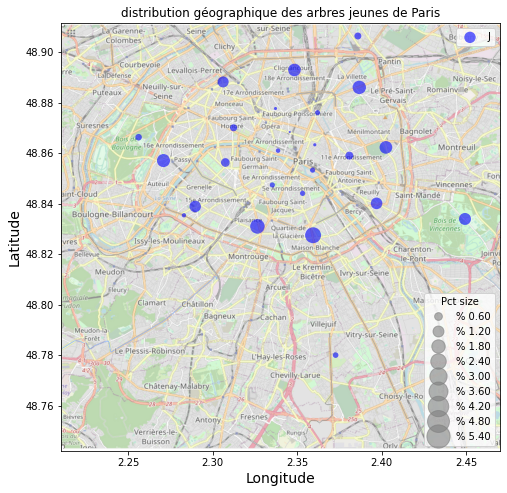

Nombre d'arbres jeune par genre
et par arrondissement


<ipython-input-19-2631f669e40d>:83: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data6=df.groupby(['arrondissement','genre'])['geo_point_2d_a','geo_point_2d_b'].mean()


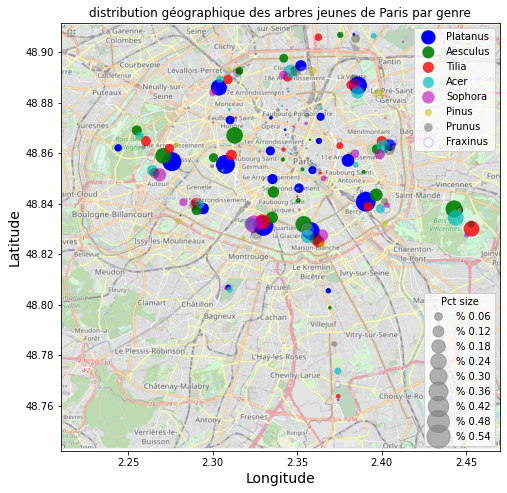

In [19]:

data3['chiffre']=1

df=data3.copy()
#on incorpore les stades estimés
df.loc[df['stade_developpement'].isna(),'stade_developpement']=df.loc[df['stade_developpement'].isna(),'stade_est']
df=df.loc[df['stade_developpement']=='J',:]

#calcul coord moyenne par arrondissement
data6=df.groupby(df['arrondissement'])['geo_point_2d_a','geo_point_2d_b'].mean()
data7=df.groupby(df['arrondissement'])['chiffre'].sum()/len(data3.index)*10000

data8 = pd.merge(data6, data7, how="inner", on=['arrondissement'])
data10=data8.reset_index()

####################################################
#box de la MAP : we use min and max of GPS data
BBox=(data['geo_point_2d_a'].min(),data['geo_point_2d_a'].max(),data['geo_point_2d_b'].min(),data['geo_point_2d_b'].max())

paris_img=img.imread('C:/Users/wesh/OCR/P2/paris_tree.png')

fig, ax = plt.subplots(figsize=(7.87,7.87))

x=data10['geo_point_2d_b']
y=data10['geo_point_2d_a']
si=data10['chiffre']
ax.scatter(x, y, s=si,color='b', label='J',alpha=0.6,
                edgecolors='none')

legend1=ax.legend()
ax.add_artist(legend1)
plt.imshow(paris_img, extent=[2.2102, 2.4698, 48.7422, 48.9115], alpha=0.8,aspect='auto')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('distribution géographique des arbres jeunes de Paris')

# Produce a legend for the size. Because we want to show size in %, 
# we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.

kw = dict(prop="sizes", num=10,alpha=0.6, color='tab:gray', fmt="% {x:.2f}",func=lambda s: (s/100))
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Pct size")

plt.show()

####################################################

df=df.loc[(df['genre']=='Platanus')|(df['genre']=='Aesculus')|
          (df['genre']=='Tilia')|(df['genre']=='Acer')|
          (df['genre']=='Sophora')|(df['genre']=='Pinus')|
          (df['genre']=='Prunus')|(df['genre']=='Fraxinus'),:]
data12=pd.crosstab(df['arrondissement'],df['genre'])

#remettre les colones dans l'ordre
data13=data12.loc[:,['Platanus','Aesculus','Tilia','Acer','Sophora','Pinus','Prunus','Fraxinus']]

data13=data13.sort_values(by=['Platanus'],ascending=False,)

import seaborn as sns
cm = sns.light_palette('purple', as_cmap=True)

#format sortie %
pd.options.display.float_format = '{:,.0f}'.format

#data13.apply(pd.to_numeric)
print("Nombre d'arbres jeune par genre")
print("et par arrondissement")
display(data13.style.background_gradient(cm).format('{:,.0f}'))


#reset formattage
pd.reset_option('^display.', silent=True)

data3['chiffre']=1

df=data3.copy()
#on incorpore les stades estimés
df.loc[df['stade_developpement'].isna(),'stade_developpement']=df.loc[df['stade_developpement'].isna(),'stade_est']
df=df.loc[df['stade_developpement']=='J',:]

data6=df.groupby(['arrondissement','genre'])['geo_point_2d_a','geo_point_2d_b'].mean()
data7=df.groupby(['arrondissement','genre'])['chiffre'].sum()/len(data3.index)*10000


data8 = pd.merge(data6, data7, how="inner", on=['arrondissement','genre'])
data9=data8.reset_index()

data10=data9.loc[(data9['genre']=='Platanus') |
                 (data9['genre']=='Aesculus')| 
                 (data9['genre']=='Tilia')|
                 (data9['genre']=='Acer')|
                 (data9['genre']=='Sophora')|
                 (data9['genre']=='Pinus')|
                 (data9['genre']=='Prunus')|
                 (data9['genre']=='Fraxinus')
                 ,:]

#reset formattage
pd.reset_option('^display.', silent=True)


####################################################
#box de la MAP : we use min and max of GPS data
BBox=(data['geo_point_2d_a'].min(),data['geo_point_2d_a'].max(),data['geo_point_2d_b'].min(),data['geo_point_2d_b'].max())


paris_img=img.imread('C:/Users/wesh/OCR/P2/paris_tree.png')

fig, ax = plt.subplots(figsize=(7.87,7.87))
x=data10.loc[data10['genre']=='Platanus','geo_point_2d_b']
y=data10.loc[data10['genre']=='Platanus','geo_point_2d_a']
si=data10.loc[data10['genre']=='Platanus','chiffre']*10
ax.scatter(x, y, s=si,color='b', label='Platanus',alpha=1,
                edgecolors='none')

x=data10.loc[data10['genre']=='Aesculus','geo_point_2d_b']
y=data10.loc[data10['genre']=='Aesculus','geo_point_2d_a']
si=data10.loc[data10['genre']=='Aesculus','chiffre']*10
ax.scatter(x, y, s=si,color='g', label='Aesculus',alpha=0.9,
                edgecolors='none')

x=data10.loc[data10['genre']=='Tilia','geo_point_2d_b']
y=data10.loc[data10['genre']=='Tilia','geo_point_2d_a']
si=data10.loc[data10['genre']=='Tilia','chiffre']*10
ax.scatter(x, y, s=si,color='r', label='Tilia',alpha=0.8,
                edgecolors='none')

x=data10.loc[data10['genre']=='Acer','geo_point_2d_b']
y=data10.loc[data10['genre']=='Acer','geo_point_2d_a']
si=data10.loc[data10['genre']=='Acer','chiffre']*10
ax.scatter(x, y, s=si,color='c', label='Acer',alpha=0.7,
                edgecolors='none')

x=data10.loc[data10['genre']=='Sophora','geo_point_2d_b']
y=data10.loc[data10['genre']=='Sophora','geo_point_2d_a']
si=data10.loc[data10['genre']=='Sophora','chiffre']*10
ax.scatter(x, y, s=si,color='m', label='Sophora',alpha=0.6,
                edgecolors='none')

x=data10.loc[data10['genre']=='Pinus','geo_point_2d_b']
y=data10.loc[data10['genre']=='Pinus','geo_point_2d_a']
si=data10.loc[data10['genre']=='Pinus','chiffre']*10
ax.scatter(x, y, s=si,color='y', label='Pinus',alpha=0.5,
                edgecolors='none')

x=data10.loc[data10['genre']=='Prunus','geo_point_2d_b']
y=data10.loc[data10['genre']=='Prunus','geo_point_2d_a']
si=data10.loc[data10['genre']=='Prunus','chiffre']*10
ax.scatter(x, y, s=si,color='k', label='Prunus',alpha=0.3,
                edgecolors='none')

x=data10.loc[data10['genre']=='Fraxinus','geo_point_2d_b']
y=data10.loc[data10['genre']=='Fraxinus','geo_point_2d_a']
si=data10.loc[data10['genre']=='Fraxinus','chiffre']*10
ax.scatter(x, y, s=si,color='w', label='Fraxinus',alpha=0.2,
                edgecolors='b')


legend1=ax.legend()
ax.add_artist(legend1)
plt.imshow(paris_img, extent=[2.2102, 2.4698, 48.7422, 48.9115], alpha=0.8,aspect='auto')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('distribution géographique des arbres jeunes de Paris par genre')


kw = dict(prop="sizes", num=10,alpha=0.6, color='tab:gray', fmt="% {x:.2f}",func=lambda s: (s/1000))
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Pct size")

plt.show()

# CONCLUSION
## **La majorité des arbres se trouvent sur les arrondissements périphériques de Paris.**
    * le 15ème arrivant en tête.On peut y ajouter le bois de Vincennes , le 7è et le 8è et enfin les cimetières du 93 et 94

## **Les alignements concentrent la majorité des arbres parisiens.
    * Les Jardins et les cimetières viennent ensuite.**

## **Le platane est de loin l’arbre le plus courant sur Paris.**
    * Les marroniers, tilleuls, érables et sophoras suivent pour représenter à eux 5: 60% des arbres.
    * La plus forte concentration de Platane se trouve par ordre décroissant dans le 7e/16e/12e
    * La plus forte concentration de Marronniers se trouve par ordre décroissant dans le 8e/16e

## Le stade  de développement le plus représenté est **l’adulte** (en majorité dans les 20e/16e/15e) au contraire des matures.

## **Les jeunes arbres qui nécessitent beaucoup de travail** (abattage/entretien) sont bien représentés dans les alignements du 13e/14e arrondissements et les autres arrondissement périphériques, bois de Vincennes compris
    * Les platanes et les marronniers sont les jeunes arbres les plus courants

## CONSEIL:
### 1) Améliorer la base:
* en étant plus propre
* en renseignant plus de champs permettant une analyse plus profonde
### 2) Optimisation des ressources: D’un point de vue analytique, les alignements des arrondissements périphériques  avec leurs platanes et marronniers doivent concentrer la majorité des efforts. 
* Ces arbres rencontrent des maladies bien connues et leurs alignements favorisent la propagation des épidémies. Il faut en abattre certains , replanter, puis veiller comme des parents ces nouveaux nés.
* Les jardins, jamais laissés à l’abandon, nécessitent également de lourds entretiens mais moins visibles dans les chiffres de notre base

### Pour aller plus loin:
* Possibilité de modéliser des anomalies de croissance
